# To be or Not To be ... the Author ?
# Did Shakespear Write All the Works by Himself? 

### Background
-  William Shakespeare is considered one of the greatest playwrights in the English language. He is
attributed with 38 plays, 154 sonnets, and other works. Even 400 years later, his writings are still be
studied in most high schools and colleges in the US and elsewhere.
- Is it possible that a single person could have written such a diverse set of masterpieces over a window
of just 24 years or so? Perhaps some of the acts or scenes were written by other notables of the day or
perhaps a group of his students.
- Shakespeare’s complete works are available online at http://shakespeare.mit.edu/ 


### The Tasks
- The task is to use machine learning/data mining techniques on the language of Shakespeare’s works by
act, scene, or other breakdown as appropriate to address the question of authorship. Your solution
should include:
- 1) Data preparation technique(s) to convert the text to features
- 2) A minimum of 2 clustering techniques to group similar acts/scenes/etc. Note that we assume
tuning will be required for each technique.
- 3) A minimum of one 2D visualization methods to interpret the clusters such as PCA, Sammons,
MDS, etc. 

### Team
- Dingchao Zhang , Pipat Thontirawong

## Step 1- Data Preparation -- Data Scraping


In [ ]:
import requests
import re
import pandas as pd

# function to get html text
def get_html(url):
    html = requests.get(url)
    return html.text

# function to get relevant urls from the main page
def get_urls(main_url):
    page = get_html(main_url)
    all_urls = re.findall('<a href="(.*?)"', page, re.DOTALL)
    return all_urls

# function to get text from each plays url
def get_plays(url):
    page = get_html(url).lower()
    playsname = re.findall('<td class="play" align="center">(.*?)<', page, re.DOTALL)[0].strip() #name of plays
    act = int(url.rsplit('/', 1)[1].rsplit('.')[1]) #act
    scene = int(url.rsplit('/', 1)[1].rsplit('.')[2]) #scene
    title = re.findall('<title>(.*?)<', page, re.DOTALL)[0].strip() #title of work
    names = []
    speeches = []

    # get speeches
    speeches_region = re.split('speech1>', page)[1]

    # get each speech
    name_speeches = re.findall('<b>(.*?)</blockquote>', speeches_region, re.DOTALL) #name and speech
    for s in name_speeches:
        name = re.findall('(.*?)</b>', s, re.DOTALL)[0].strip() #get name
        raw_speech = re.split('<blockquote>', s)[1] #get all lines
        lines = re.findall('[0-9]>(.*?)</', raw_speech, re.DOTALL) #get list of lines
        speech = [line.strip() for line in lines]
        names.append(name)
        speeches.append(speech)
    print(len(names), len(speeches))

    # load to pandas df
    df = pd.DataFrame(columns=['playname', 'title', 'act', 'scene', 'line', 'speaker', 'speech'])
    for i in range(len(speeches)):
        df.loc[i] = [playsname, title, act, scene, i, names[i], speeches[i]]
    print(url + ' load complete')
    return df

# function to get text from each other plays url
def get_other_plays(url):
    page = get_html(url).lower()
    playsname = re.findall('<td class="play" align="center">(.*?)<', page, re.DOTALL)[0].strip() #name of plays
    act = int(url.rsplit('/', 1)[1].rsplit('.')[1]) #act
    scene = int(url.rsplit('/', 1)[1].rsplit('.')[2]) #scene
    title = re.findall('<title>(.*?)<', page, re.DOTALL)[0].strip() #title of work
    names = []
    speeches = []

    # get speeches
    speeches_region = re.split('</h3>', page)[1]

    # get each speech
    name_speeches = re.findall('<strong>(.*?)/blockquote>', speeches_region, re.DOTALL) #name and speech
    for s in name_speeches:
        name = re.findall('(.*?)</strong>', s, re.DOTALL)[0].strip() #get name
        raw_speech = re.split('<blockquote', s)[1] #get all lines
        lines = re.findall('>(.*?)<', raw_speech, re.DOTALL) #get list of lines
        speech = [line.strip() for line in lines]
        names.append(name)
        speeches.append(speech)
    print(len(names), len(speeches))

    # load to pandas df
    df = pd.DataFrame(columns=['playname', 'title', 'act', 'scene', 'line', 'speaker', 'speech'])
    for i in range(len(speeches)):
        df.loc[i] = [playsname, title, act, scene, i, names[i], speeches[i]]
    print(url + ' load complete')
    return df

# function to get text from each prologue url
def get_prologue(url):
    page = get_html(url).lower()
    playsname = re.findall('<td class="play" align="center">(.*?)<', page, re.DOTALL)[0].strip() #name of plays
    act = int(url.rsplit('/', 1)[1].rsplit('.')[1]) #act
    scene = int(url.rsplit('/', 1)[1].rsplit('.')[2]) #scene
    title = re.findall('<title>(.*?)<', page, re.DOTALL)[0].strip() #title of work
    speeches = []

    # get speeches
    speeches_region = re.split('</h3>', page)[1]

    # get each speech
    lines = re.findall('=[0-9+]>(.*?)</a', speeches_region, re.DOTALL) #get list of lines
    if lines:
        speech = [line.strip() for line in lines]
        speeches.append(speech)
    print(len(speeches))

    # load to pandas df
    df = pd.DataFrame(columns=['playname', 'title', 'act', 'scene', 'line', 'speaker', 'speech'])
    for i in range(len(speeches)):
        df.loc[i] = [playsname, title, act, scene, i, 'Prologue', speeches[i]]
    print(url + ' load complete')
    return df

# function to get text from each poetry url --FIX THIS
def get_poems(url):
    page = get_html(url).lower()
    poem_name = re.findall('<h1>(.*?)<', page, re.DOTALL)[0].strip() #name of poem
    poems = []

    # get poem
    poem_region1 = re.findall('<blockquote(.*?)</blockquote>', page, re.DOTALL)
    poem_region2 = re.findall('<p(.*?)/p>', page, re.DOTALL)
    poem_region3 = re.findall('<tr(.*?)/tr>', page, re.DOTALL)
    poem_region = poem_region1 + poem_region2 + poem_region3
    for p in poem_region:
        lines = re.findall('>(.*?)<', p, re.DOTALL)
        if lines:
            poem_lines = [line.strip() for line in lines]
            poems.append(poem_lines)
    print(len(poems))

    # load to pandas df
    df = pd.DataFrame(columns=['poem_name', 'poem'])
    for i in range(len(poems)):
        df.loc[i] = [poem_name, poems[i]]
    print(url + ' load complete')
    return df


# function to get text from each poetry url
def get_sonnets(url):
    page = get_html(url).lower()
    poem_name = re.findall('<h1>(.*?)<', page, re.DOTALL)[0].strip() #name of poem
    poems = []

    # get poem
    poem_region = re.split('<blockquote', page, re.DOTALL)[1]
    lines = re.findall('>(.*?)<', poem_region, re.DOTALL)
    if lines:
        poem_lines = [line.strip() for line in lines]
        poems.append(poem_lines)
    print(len(poems))

    # load to pandas df
    df = pd.DataFrame(columns=['poem_name', 'poem'])
    for i in range(len(poems)):
        df.loc[i] = [poem_name, poems[i]]
    print(url + ' load complete')
    return df


## get all urls to txt files
def save_urls():
    root = 'http://shakespeare.mit.edu'
    all_main_urls = get_urls(root)

    ## separate Poetry from Plays
    poetry_main_urls = [url for url in all_main_urls if (url[:6] == 'Poetry')]
    plays_main_urls = [url for url in all_main_urls if (url not in poetry_main_urls)]
    poetry_main_urls = [root + '/' + url for url in poetry_main_urls] #add prefix
    plays_main_urls = [root + '/' + url for url in plays_main_urls] #add prefix

    ## get urls inside each plays
    plays_all_urls = []
    prologue_all_urls = []
    plays_all_others_urls = []

    for url in plays_main_urls:
        prefix = re.findall('mit.edu/(.*?)/', url)[0]
        plays_urls = get_urls(url)
        plays_urls = [url for url in plays_urls if (url[-5:] == '.html' and url != 'full.html')]

        plays_only_urls = [url for url in plays_urls if (url[-7:] != '.0.html' and url[:11] != '3henryvi.5.')] #exclude prologue
        prologue_urls = [url for url in plays_urls if (url[-7:] == '.0.html')] #get prologue
        plays_other_urls = [url for url in plays_urls if (url[-7:] != '.0.html' and url[:11] == '3henryvi.5.')] #get 3henryvi.5.x

        plays_only_urls = [root + '/' + prefix + '/' + url for url in plays_only_urls] #add prefix
        prologue_urls = [root + '/' + prefix + '/' + url for url in prologue_urls] #add prefix
        plays_other_urls = [root + '/' + prefix + '/' + url for url in plays_other_urls] #add prefix
        plays_all_urls.extend(plays_only_urls) #add to list
        prologue_all_urls.extend(prologue_urls) #add to list
        plays_all_others_urls.extend(plays_other_urls) #add to list

    ## get urls inside each poetry
    poetry_all_urls = poetry_main_urls[1:] #get every urls except The Sonnets

    ## get urls inside The Sonnets
    sonnet_main_url = poetry_main_urls[0]
    prefix = re.findall('mit.edu/(.*?)/', sonnet_main_url)[0]
    sonnet_page = get_html(sonnet_main_url)
    sonnet_urls = re.findall('<A HREF="(.*?)"', sonnet_page, re.DOTALL)
    sonnet_urls = [root + '/' + prefix + '/' + url for url in sonnet_urls] #add prefix

    ## write to .txt
    with open('urls_plays.txt', 'w') as f:
        for x in plays_all_urls:
            f.write(x)
            f.write('\n')

    with open('urls_plays_other.txt', 'w') as f:
        for x in plays_all_others_urls:
            f.write(x)
            f.write('\n')

    with open('urls_prologue.txt', 'w') as f:
        for x in prologue_all_urls:
            f.write(x)
            f.write('\n')

    with open('urls_poetry.txt', 'w') as f:
        for x in poetry_all_urls:
            f.write(x)
            f.write('\n')

    with open('urls_sonnets.txt', 'w') as f:
        for x in sonnet_urls:
            f.write(x)
            f.write('\n')

    return

## Step 2 -- Data Tokenization
- In lexical analysis, tokenization is the process of breaking a stream of text up into words, phrases, symbols, or other meaningful elements called tokens. The list of tokens becomes input for further processing such as parsing or text mining. Tokenization is useful both in linguistics (where it is a form of text segmentation), and in computer science, where it forms part of lexical analysis.

In [ ]:
import pandas as pd
import re
from nltk.tokenize import wordpunct_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords

## tokenize, stem, remove stopwords
def tokenStem(words):
    words = words.strip('[').strip(']').lower() #remove brackets and lowercase
    words = re.sub('[(){}<>:,.!?\'"]', '', words)
    stemmer = PorterStemmer()
    stops = stopwords.words('english')
    output = [stemmer.stem(token) for token in wordpunct_tokenize(words) if token not in stops ] #stem words
    return " ".join(output) #merge into strings

#### Main ####
if __name__ == '__main__':

    # import file
    df = pd.read_csv('all_plays.txt', sep='\t')

    # tokenize, stem, and remove stopwords
    df['speech'] = df['speech'].map(lambda x: tokenStem(x))

    # write to 'all_plays_tokenized.txt'
    df.to_csv('all_plays_tokenized.txt', sep='\t', index=False)


### Below is an exerpt of tokenized corpus data from Shakespear's plays

## Step 3 -- Feature Extraction -- Bag of Words
Term Frequency - Inverse document Frequency (TD IDF) function is based on a work of Spärck Jones and Karen in 1972. It basically combines local frequency property of a specific word in the document with a global property based on the number (inverse) of documents containing this word. Further technical details are available in internet (let me know if you are interested to the original paper published).

Below is an example of extracting features from poems

In [ ]:
## Trying different feature extraction methods from sckitlearn and see if can be applied to HW4
## More note can be found in the trial and test note.docx

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import Normalizer

import pandas as pd
import numpy as np


# Initialize the "TfidVectorizer" object, which is scikit-learn's
# bag of words tool. http://scikit-learn.org/dev/modules/feature_extraction.html#text-feature-extraction
vectorizer = TfidfVectorizer(analyzer = "word",   \
                             tokenizer = None,    \
                             preprocessor = None, \
                             stop_words = None,   \
                             max_features = 5000)


## Initialize n-gram vectorizer
ngram2_vectorizer = CountVectorizer(ngram_range=(2, 2),token_pattern=r'\b\w+\b', min_df=1, max_features = 5000)
ngram4_vectorizer = CountVectorizer(ngram_range=(4, 4),token_pattern=r'\b\w+\b', min_df=1, max_features = 5000)


## These following two tools are also initialized, but can't be used report dtype error
## TO-DO: need to fix it
transformer = TfidfTransformer()
hashvect = HashingVectorizer()

#import file
df = pd.read_csv('Data/all_poems_tokenized.txt',sep='\t')

# Get all the poem names
poemnames = pd.unique(df.poem_name.ravel())

# Array to hold bag of words for each poem
poem_bagwords = []
# Arrays to hold labels
poem_label = []

# Vectorizer results are normalized, which makes KMeans behave as
# spherical k-means for better results. Since LSA/SVD results are
# not normalized, we have to redo the normalization.
# svd = TruncatedSVD()
# normalizer = Normalizer(copy=False)
# lsa = make_pipeline(svd, normalizer)

## loop through all poems
for i in range(len(poemnames)):
    
    ### Create bag of words for all plays
    p = df[df['poem_name'] == poemnames[i]] # Get the sub data frame of each play
    s = "" # Initiate empty string to hold bag of words for play
    # Iterate all the rows to append the poem words to a string
    for index,row in p.iterrows():
        s += str(row['poem'])

    # Append the bag of words to each poem
    poem_bagwords.append(s)
    # Append the label to each row
    poem_label.append(str(poemnames[i]))
    
f = open("poem_feature_labels.txt", "w")
f.write("\n".join(map(lambda x: str(x), poem_label)))
f.close()



# Vectorize analyze the similarities among poems
# fit_transform() does two functions: First, it fits the model
# and learns the vocabulary; second, it transforms our training data
# into feature vectors. The input to fit_transform should be a list of 
# strings.
poem_vect = vectorizer.fit_transform(poem_bagwords)
poem_ngram2= ngram2_vectorizer.fit_transform(poem_bagwords)
poem_ngram2 = poem_ngram2.toarray() 
poem_ngram4 = ngram4_vectorizer.fit_transform(poem_bagwords)
poem_ngram4 = poem_ngram4.toarray() 


# # Numpy arrays are easy to work with, so convert the result to an 
# # array
poem_feature = poem_vect.toarray() # Show the similarity array of plays
# poem_feature2 = lsa.fit_transform(play_feature) # Apply Latent Semantic Analysis
# explained_variance = svd.explained_variance_ratio_.sum()
# print(explained_variance)


# See the data arrary: print (play_feature.shape)

# Write the plays feature array to a csv file
np.savetxt("Poem_Features_Vectorize.txt", poem_feature, delimiter=",")
np.savetxt("Poem_Features_ngram2.txt", poem_ngram2, delimiter=",")
np.savetxt("Poem_Features_ngram4.txt", poem_ngram4, delimiter=",")
# np.savetxt("Poem_Features_Vectorize_LSA.txt", poem_feature2, delimiter=",")

# Take a look at the words in the vocabulary
# vocab = vectorizer.get_feature_names()

# import numpy as np
# print(vocab)

### Print the count of each word in vocab -- not working somehow
# # Sum up the counts of each vocabulary word
# dist = np.sum(play_feature, axis=0)
# # For each, print the vocabulary word and the number of times it 
# # appears in the training set
# for tag, count in zip(vocab, dist):
#     print (count, tag)



#Y = transformer.fit_transform(play_bagwords) -- To DO fix the error: no supported conversion for types: (dtype('<U98727')

## Step 4 -- Feature Extraction -- Type Token Ratio and Readability
- Type Token Ratio( Richness of vocabulary)
http://www.lexically.net/downloads/version5/HTML/index.html?type_token_ratio_proc.htm
The type-token ratio V/N, V representing the size of the vocabulary of the sample, and N the number of tokens, is a measure indicating the vocabulary richness of an author.
Completed, see folder TypeTokenRatioFeatures
- Readability
https://en.wikipedia.org/wiki/Coleman%E2%80%93Liau_index
The Coleman–Liau index is calculated with the following formula:
 
The Coleman–Liau index is a readability test designed by Meri Coleman and T. L. Liau to gauge the understandability of a text. The Coleman–Liau index was designed to be easily calculated mechanically from samples of hard-copy text. Unlike syllable-based readability indices, it does not require that the character content of words be analyzed, only their length in characters. Therefore, it could be used in conjunction with theoretically simple mechanical scanners that would only need to recognize character, word, and sentence boundaries, removing the need for full optical character recognition or manual keypunching.


In [ ]:
## Extract type token ratio, average word length, average sentence length,Coleman–Liau index  and other features 
## Refer to the Readability_Features folder, Column_Denote.txt
import pandas as pd
import numpy as np
import re

from nltk.corpus import gutenberg
from nltk.tokenize import wordpunct_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.porter import PorterStemmer

## tokenize, stem, remove stopwords
def tokenStem(words):
    words = words.strip('[').strip(']').lower() #remove brackets and lowercase
    words = re.sub('[(){}<>\'"]', '', words)
    stemmer = PorterStemmer()
#     stops = stopwords.words('english')
    output = [stemmer.stem(token) for token in wordpunct_tokenize(words) ] #stem words
    return "".join(words) #merge into strings

#import file
df = pd.read_csv('Data/all_plays.txt',sep='\t')
# tokenize, stem, and remove stopwords
df['speech'] = df['speech'].map(lambda x: tokenStem(x))

# Get all the play names
playnames = pd.unique(df.playname.ravel())

# df['speech'] = df['speech'].map(lambda x: tokenStem(x))
# # Array to hold bag of words for each play
play_bagwords = []
act_bagwords = []
scene_bagwords = []

## loop through all plays
for i in range(len(playnames)):
    
    ### Create bag of words for all plays
    p = df[df['playname'] == playnames[i]] # Get the sub data frame of each play
    s = "" # Initiate empty string to hold bag of words for play

    # Iterate all the rows to append the speech and speaker words to a string
    for index,row in p.iterrows():
        s += str(row['speaker'])
        s += str(row['speech'])
    
    # Append the bag of words to each play
    play_bagwords.append(s)
   
    ### Create bag of words for all the acts in each play
    s = "" # Initiate empty string to hold bag of words for acts
    acts = pd.unique(p.act.ravel()) # Get the number of acts and scenes
    for j in range(len(acts)):
        
        a = p[p['act'] == acts[j]] #Get the current act
        # Array to hold bag of words for each bag
#         act_bagwords = []
         # Iterate all the rows to append the speech and speaker words to a string
        for index,row in a.iterrows():
            s += str(row['speaker'])
            s += str(row['speech'])
        
         # Append the bag of words to each act within the play
        act_bagwords.append(s) 
        s = ""
        scenes = pd.unique(a.scene.ravel()) # Get the number of acts and scenes
        # Array to hold bag of words for each scene
#         scene_bagwords = []
        for z in range(len(scenes)):
        
            sc = a[a['scene'] == scenes[z]] #Get the current act
        
             # Iterate all the rows to append the speech and speaker words to a string
            for index,row in sc.iterrows():
                s += str(row['speaker'])
                s += str(row['speech'])
    
            # Append the bag of words to each act within the play
            scene_bagwords.append(s)  
 ## Initiate arrays to hold stats about the works
num_sentences = [] 
num_words = []
num_letters = []
avglen_words = []
avglen_sentences = []
CLI_score = []
# count_less5letter_words = []
# count_6to10letter_words = []
# count_11to15letter_words = []
# count_16to19letter_words = []
# count_20to25letter_words = []
# count_morethan25letter_words = []


# Loop through all scenes
for x in scene_bagwords: 
    x = re.sub('[(){}<>\'?,!:;"]', '.', x) # Replace all signs with .
    x = x.split('.') # Split into sentences
    num_sentence = len(x) # Get the number of sentences for this play
    num_word = 0
    num_letter = 0
    cli = 0
    for y in x:
        y = wordpunct_tokenize(y)
        num_word += len((y)) # Accumulate the number of words for this sentence
        for z in y:
            num_letter += len(z) 
    cli = 5.88*num_letter/num_word - 29.6*num_sentence/num_word - 15.8
    num_letters.insert(-1,num_letter) # Insert  num_letters into the array
    num_words.insert(-1,num_word) # Insert  num_words into the array
    num_sentences.insert(-1,num_sentence) # Insert  num_sentences into the array
    avglen_words.insert(-1,num_letter/num_word)
    avglen_sentences.insert(-1,num_word/num_sentence)
    CLI_score.insert(-1,cli)
stats_feature = [num_letters,num_words,num_sentences,CLI_score,avglen_words,avglen_sentences]
# print(num_sentences,num_words,num_letters,CLI_score)
stats_feature = np.array(stats_feature)
stats_feature = stats_feature.T
np.savetxt("Scene_style_feature.txt", stats_feature, delimiter=",")

#     # print(play_ttratio)
# np.savetxt("Act_TTratio_.txt", act_ttratio, delimiter=",")
# # Split to each sentence
# e = d.split('.')
# # print(e)
# print(e[1])
# # Get the number of sentences in this corpos
# print(len(e)-1)
# ## Get the length(number of words) of the sentence 1
# print(len(wordpunct_tokenize(e[1])))
# ## Split the sentence into words
# f = wordpunct_tokenize(e[1])
# print (len(f[0]))
# # f = wordpunct_tokenize(e[1])
# # print(f)
# # print(len(f[0])) 

act_ttratio = []

for x in act_bagwords:
    total_words = len(wordpunct_tokenize(x))  # Get the number of words used
    total_vocab = len(set(wordpunct_tokenize(x))) # Get the number of unique vocabs used
    act_ttratio.insert(-1,total_vocab/total_words) # Insert the ttratio 
# print(play_ttratio)
np.savetxt("Act_TTratio_.txt", act_ttratio, delimiter=",")

## Array to hold the token type ratio, the higher the ratio, the richer the vocab is
play_ttratio = []

for x in play_bagwords:
    total_words = len(wordpunct_tokenize(x))  # Get the number of words used
    total_vocab = len(set(wordpunct_tokenize(x))) # Get the number of unique vocabs used
    play_ttratio.insert(-1,total_vocab/total_words) # Insert the ttratio 
print(play_ttratio)
np.savetxt("Play_TTratio_.txt", play_ttratio, delimiter=",")

## Step 5 -- Dimensionality Reduction / Extraction 
This step is to get the data ready for visualization

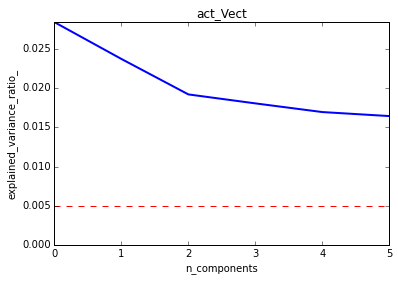


None


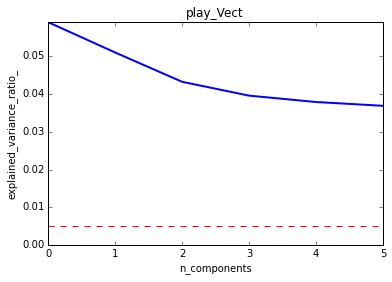


None


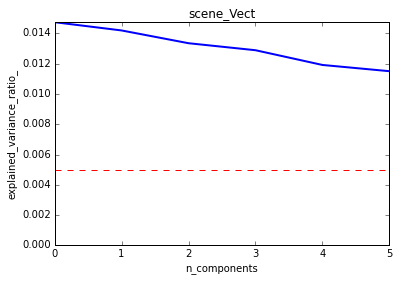


None


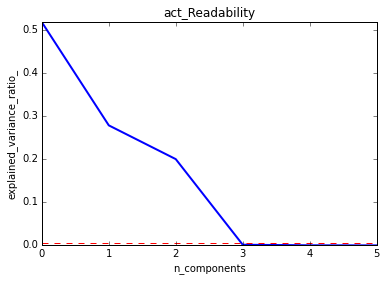


None


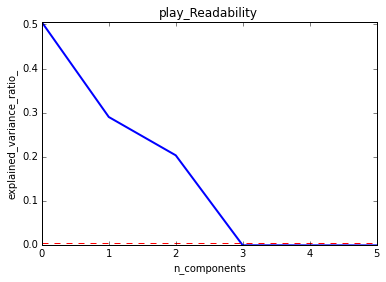


None


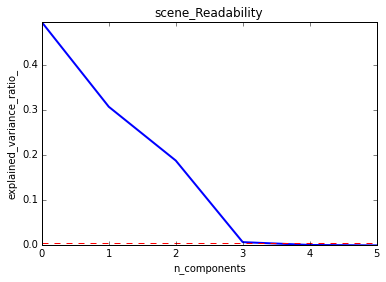


None
PCA first 2 components projection: 0.32 sec


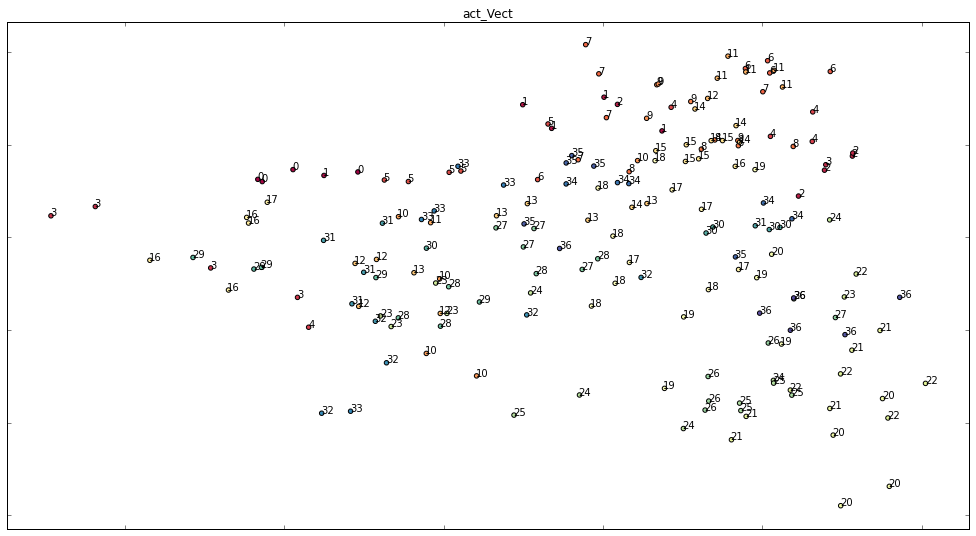

None
PCA first 2 components projection: 0.055 sec


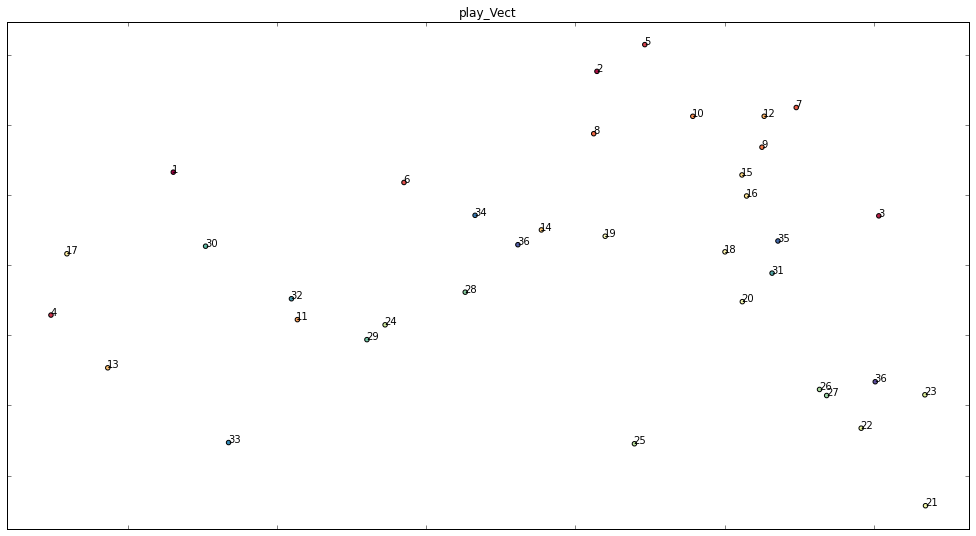

None
PCA first 2 components projection: 1.8 sec


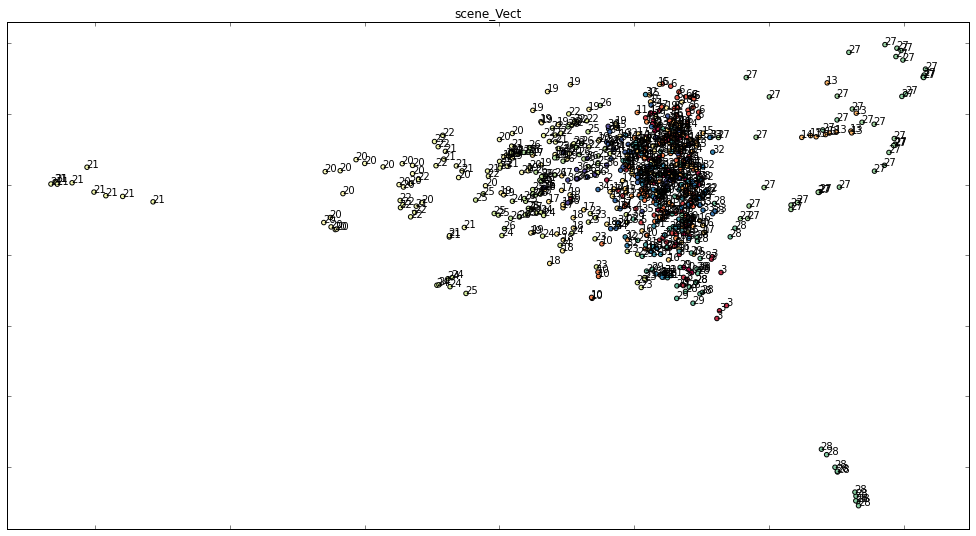

None
PCA first 2 components projection: 0.001 sec


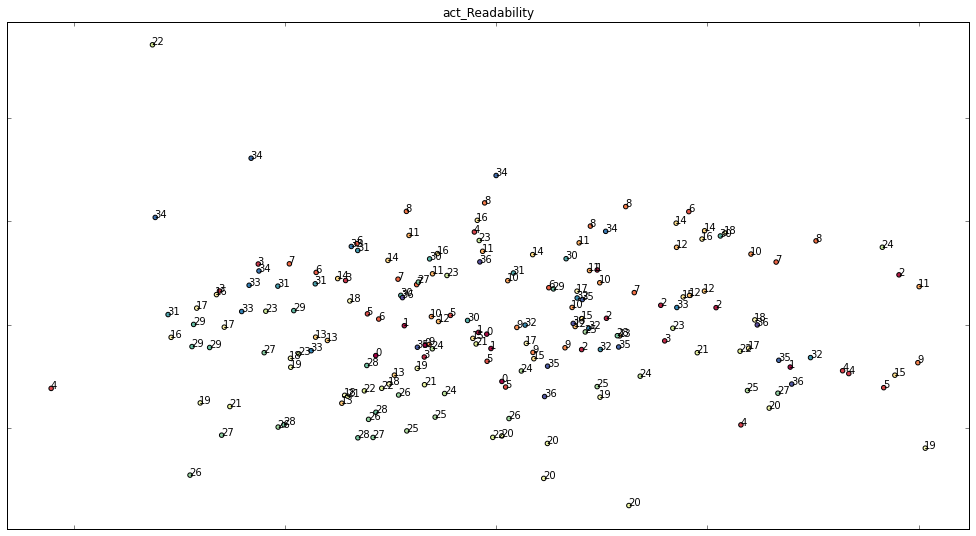

None
PCA first 2 components projection: 0.001 sec


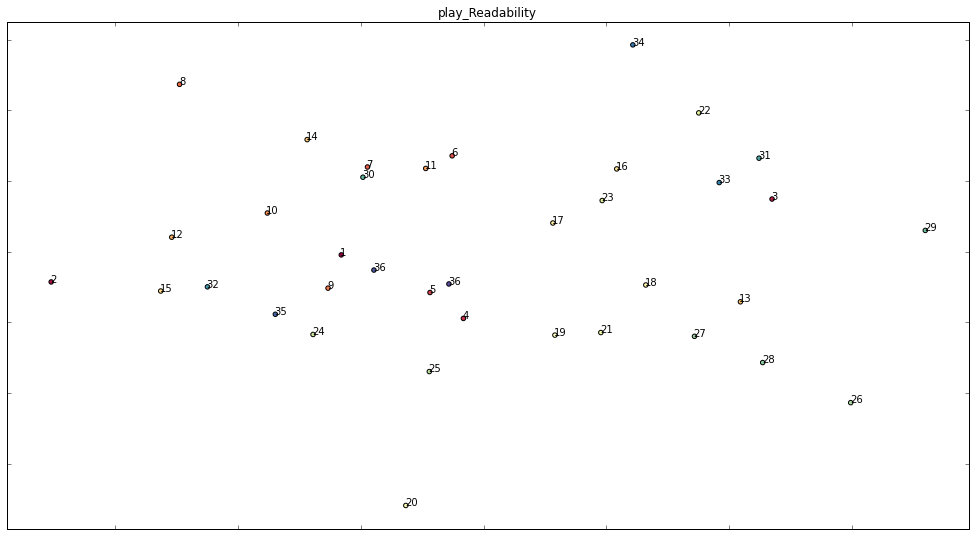

None
PCA first 2 components projection: 0 sec


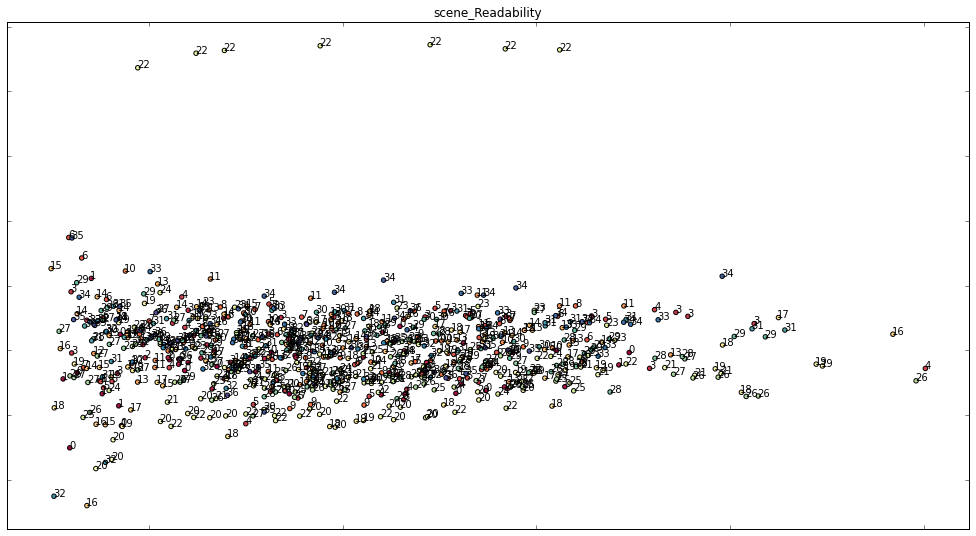

None

Visualizing the act Readability features without labels... 

standard: 0.074 sec
ltsa: 0.061 sec
hessian: 0.091 sec
modified: 0.063 sec
Isomap: 0.027 sec
MDS: 0.11 sec
SpectralEmbedding: 0.037 sec
t-SNE: 0.45 sec


C:\Users\ks692\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\axes\_subplots.py:69: MatplotlibDeprecationWarning: The use of 0 (which ends up being the _last_ sub-plot) is deprecated in 1.4 and will raise an error in 1.5
  mplDeprecation)


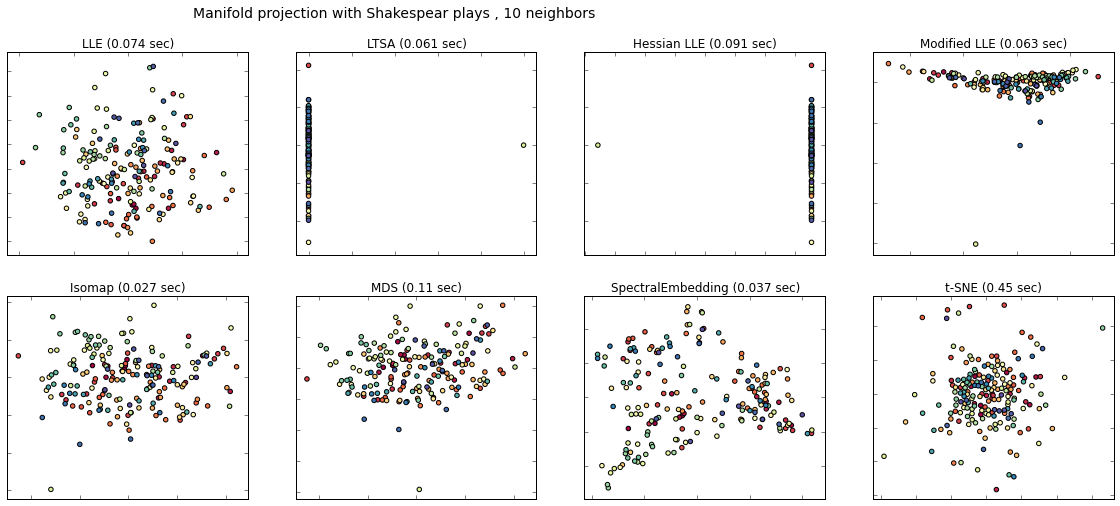


Visualizing the play Readability features without labels... 

standard: 0.018 sec
ltsa: 0.012 sec
hessian: 0.019 sec
modified: 0.011 sec
Isomap: 0.002 sec
MDS: 0.026 sec
SpectralEmbedding: 0.011 sec
t-SNE: 0.27 sec


C:\Users\ks692\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\axes\_subplots.py:69: MatplotlibDeprecationWarning: The use of 0 (which ends up being the _last_ sub-plot) is deprecated in 1.4 and will raise an error in 1.5
  mplDeprecation)


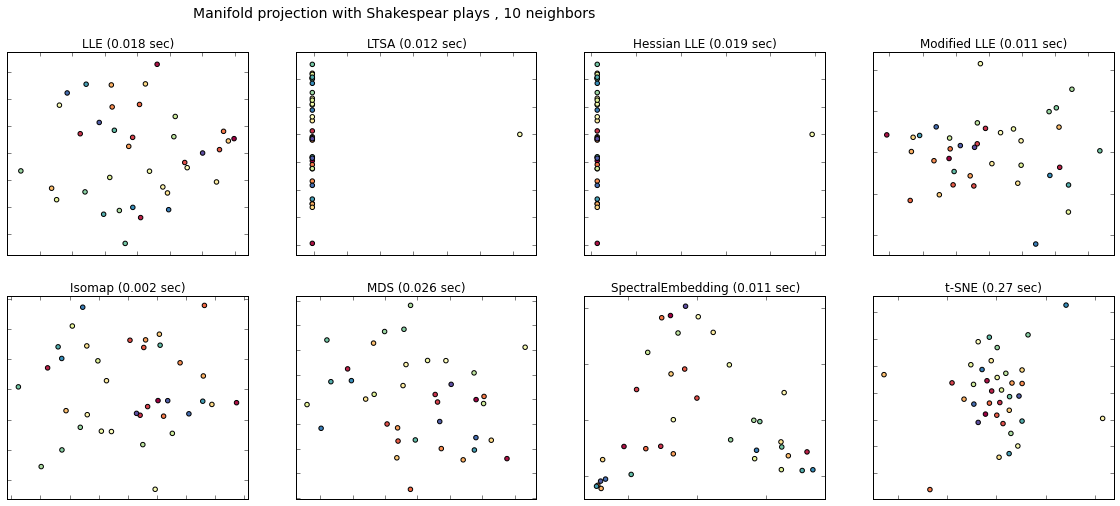


Visualizing the play_Vect features without labels... 

standard: 0.11 sec
ltsa: 0.055 sec
hessian: 0.063 sec
modified: 0.065 sec
Isomap: 0.019 sec
MDS: 0.021 sec
SpectralEmbedding: 0.026 sec
t-SNE: 0.22 sec


C:\Users\ks692\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\axes\_subplots.py:69: MatplotlibDeprecationWarning: The use of 0 (which ends up being the _last_ sub-plot) is deprecated in 1.4 and will raise an error in 1.5
  mplDeprecation)


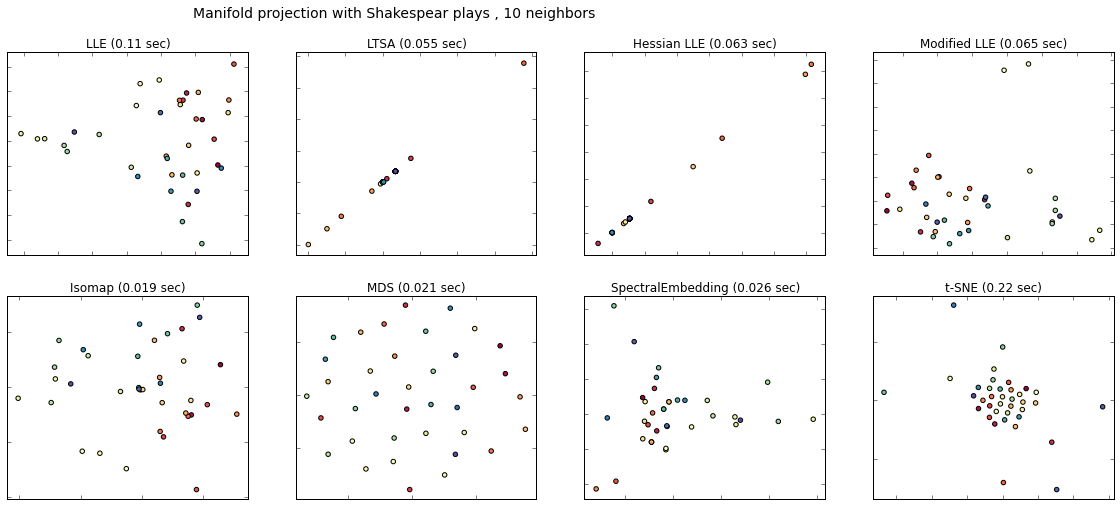


Visualizing the act_Vect features without labels... 

standard: 0.57 sec
ltsa: 0.75 sec
hessian: 0.85 sec
modified: 0.99 sec
Isomap: 0.47 sec
MDS: 0.13 sec
SpectralEmbedding: 0.43 sec
t-SNE: 1.8 sec


C:\Users\ks692\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\axes\_subplots.py:69: MatplotlibDeprecationWarning: The use of 0 (which ends up being the _last_ sub-plot) is deprecated in 1.4 and will raise an error in 1.5
  mplDeprecation)


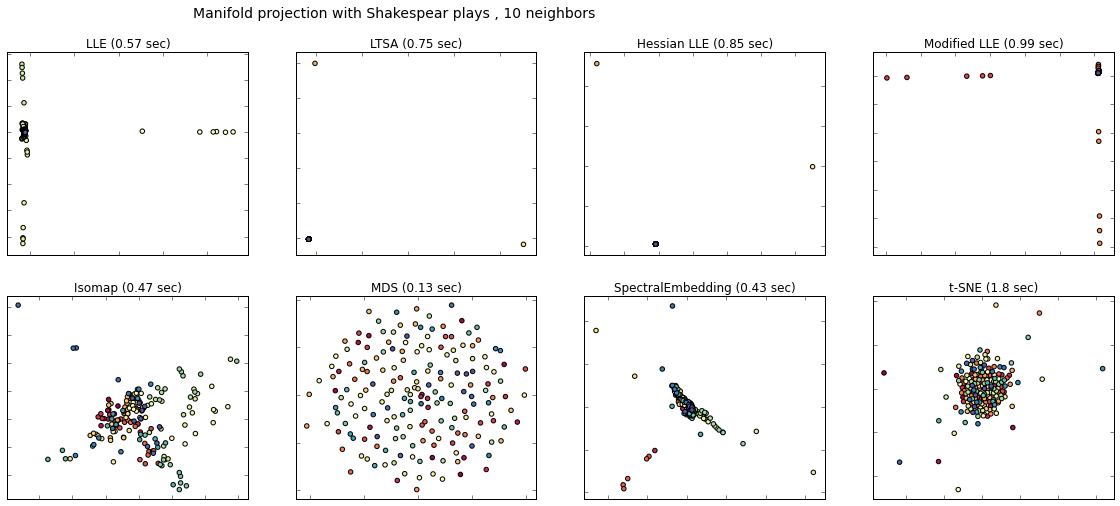


Visualizing the play_Vect_LSA features without labels... 

standard: 0.011 sec
ltsa: 0.012 sec
hessian: 0.028 sec
modified: 0.011 sec
Isomap: 0.002 sec
MDS: 0.01 sec
SpectralEmbedding: 0.009 sec
t-SNE: 0.16 sec


C:\Users\ks692\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\axes\_subplots.py:69: MatplotlibDeprecationWarning: The use of 0 (which ends up being the _last_ sub-plot) is deprecated in 1.4 and will raise an error in 1.5
  mplDeprecation)


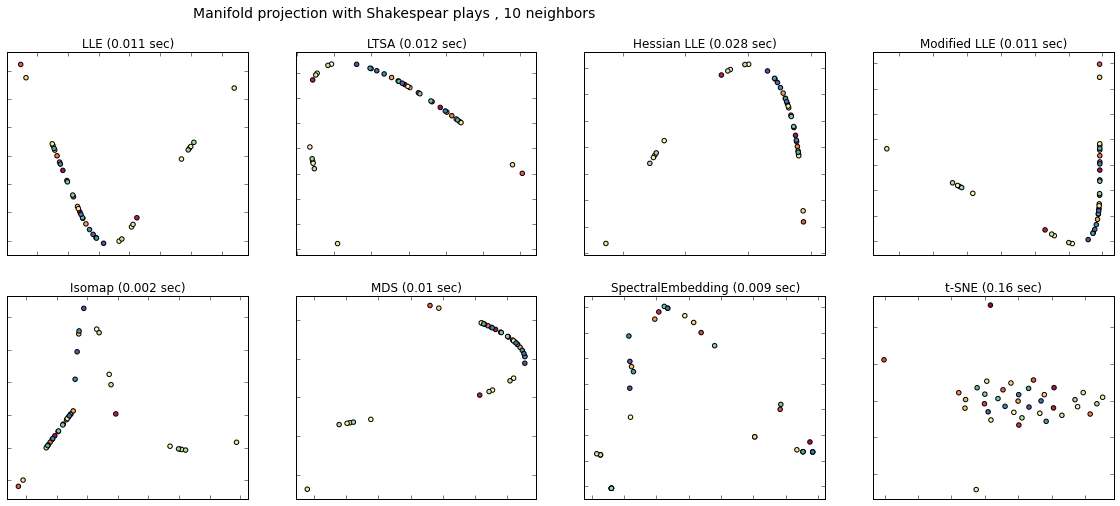


Visualizing the act_Vect_LSA features without labels... 

standard: 0.041 sec
ltsa: 0.062 sec
hessian: 0.11 sec
modified: 0.092 sec
Isomap: 0.023 sec
MDS: 0.21 sec
SpectralEmbedding: 0.065 sec
t-SNE: 0.56 sec


C:\Users\ks692\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\axes\_subplots.py:69: MatplotlibDeprecationWarning: The use of 0 (which ends up being the _last_ sub-plot) is deprecated in 1.4 and will raise an error in 1.5
  mplDeprecation)


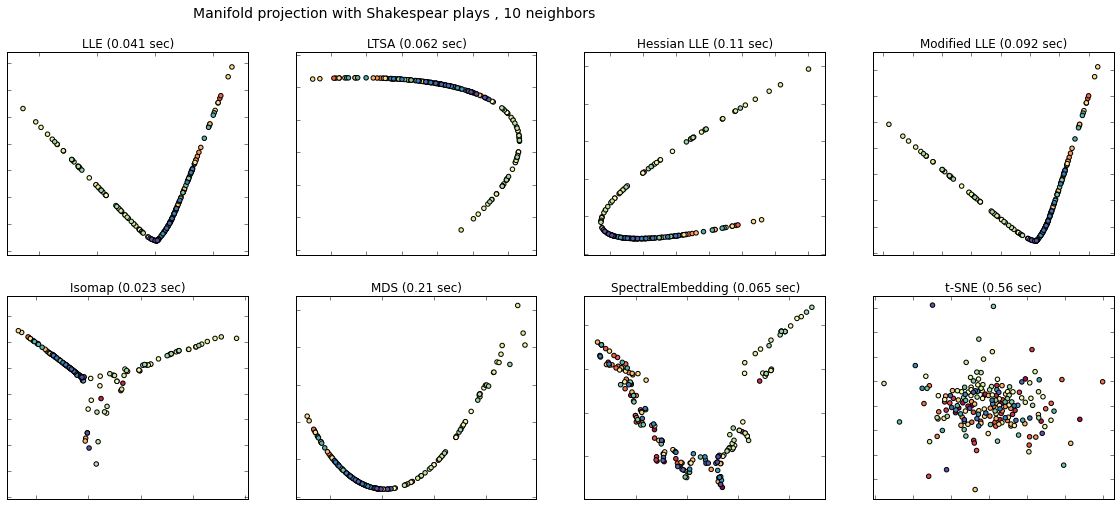


Visualizing the scene_Vect_LSA features without labels... 

standard: 0.16 sec
ltsa: 0.27 sec
hessian: 0.4 sec
modified: 0.31 sec
Isomap: 0.37 sec
MDS: 3.4 sec
SpectralEmbedding: 1.9 sec
t-SNE: 9.6 sec


C:\Users\ks692\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\axes\_subplots.py:69: MatplotlibDeprecationWarning: The use of 0 (which ends up being the _last_ sub-plot) is deprecated in 1.4 and will raise an error in 1.5
  mplDeprecation)


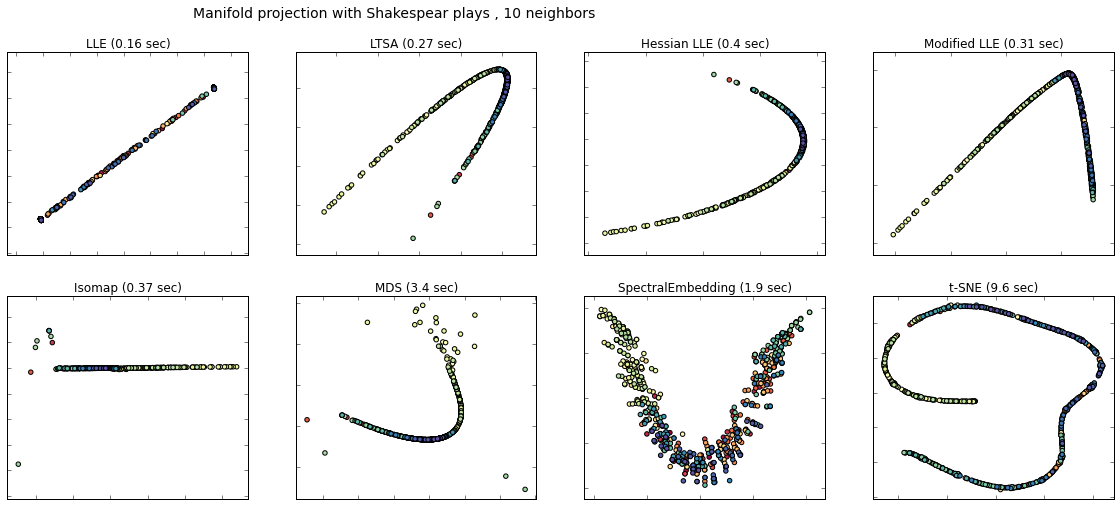

In [5]:
## Trying different clustering methods on the extracted feature arrays
## More note can be found in the trial and test note.docx
%matplotlib inline 
from time import time
from sklearn import metrics
from scipy import linalg
import matplotlib as mpl
import matplotlib.pyplot as plt
import itertools
import pandas as pd
import numpy as np
from time import time

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter
from sklearn.preprocessing import StandardScaler
from sklearn import manifold
from sklearn.decomposition import PCA
# Next line to silence pyflakes. This import is needed.
Axes3D



# #import vectorized feature arrays for acts and scenes
act_Vect = pd.read_csv('VectorizedFeatures/AllComplied/AllAct_Features_Vectorize.txt',sep=',',header = None)
scene_Vect = pd.read_csv('VectorizedFeatures/AllComplied/AllScene_Features_Vectorize.txt',sep=',',header = None)
play_Vect = pd.read_csv('VectorizedFeatures/AllComplied/ALLPlay_Features_Vectorize.txt',sep=',',header = None)

#import LSA reduced vectorized feature arrays for acts and scenes
act_Vect_LSA = pd.read_csv('LSA_VectorizedFeatures/Act_Features_Vectorize_LSA.txt',sep=',',header = None)
scene_Vect_LSA = pd.read_csv('LSA_VectorizedFeatures/Scene_Features_Vectorize_LSA.txt',sep=',',header = None )
play_Vect_LSA = pd.read_csv('LSA_VectorizedFeatures/Play_Features_Vectorize_LSA.txt',sep=',',header = None )

#import labels
act_Labels = pd.read_csv('LSA_VectorizedFeatures/act_feature_labels.txt',sep='\n',header = None)
scene_Labels= pd.read_csv('LSA_VectorizedFeatures/scene_feature_labels.txt',sep='\n',header = None )
play_Labels= pd.read_csv('LSA_VectorizedFeatures/play_feature_labels.txt',sep='\n',header = None )

# print(scene_Labels)
#     explained_variance = svd.explained_variance_ratio_.sum()
#     print(explained_variance)
act_Readability = pd.read_csv('Readability_Features/Act_Readability_Feature.txt',sep=',',header = None)
play_Readability = pd.read_csv('Readability_Features/Play_Readability_Feature.txt',sep=',',header = None)
scene_Readability = pd.read_csv('Readability_Features/Scene_Readability_Feature.txt',sep=',',header = None)


## Standardize matrix
def standardize(X):
    return StandardScaler().fit_transform(X)
act_Readability = standardize(act_Readability)
play_Readability = standardize(play_Readability)
scene_Readability = standardize(scene_Readability)
act_Vect = standardize(act_Vect)
play_Vect = standardize(play_Vect)
scene_Vect = standardize(scene_Vect)
act_Vect_LSA  = standardize(act_Vect_LSA )
play_Vect_LSA  = standardize(play_Vect_LSA )
scene_Vect_LSA  = standardize(scene_Vect_LSA )

## Function to get the annotation label
def get_play_number(X):
    result = []
    num = 0
    for i in range(len(X)):
        try:
            if X[0][i].split("_")[0] != X[0][i+1].split("_")[0]:
                num = num + 1            
            result.append(num)
        except:
            result.append(num)
    return result

play_annot = get_play_number(play_Labels)
act_annot = get_play_number(act_Labels)
scene_annot = get_play_number(scene_Labels)

## Adapated from http://scikit-learn.org/stable/auto_examples/manifold/plot_compare_methods.html#example-manifold-plot-compare-methods-py
## There are errors when apply to scene_Vect
## Visualize the plays by projecting them on non-linear plane to differ from the PCA projection
def manifold_projection(X,L=None, n_neighbors = 10,n_components = 2):
    
    
    fig = plt.figure(figsize=(25, 8))
    plt.suptitle("Manifold projection with %s , %i neighbors"
             % ("Shakespear plays", n_neighbors), fontsize=14)


    size = len(X)
    color = range(size)
    #color = annot
    color = [x/size for x in color]

    methods = ['standard', 'ltsa', 'hessian', 'modified']
    labels = ['LLE', 'LTSA', 'Hessian LLE', 'Modified LLE']
    

   

    for i, method in enumerate(methods):
        t0 = time()
        Y = manifold.LocallyLinearEmbedding(n_neighbors, n_components,
                                            eigen_solver='auto',
                                            method=method).fit_transform(X)
        t1 = time()
        print("%s: %.2g sec" % (methods[i], t1 - t0))

        ax = fig.add_subplot(252 + i)
        plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
        plt.title("%s (%.2g sec)" % (labels[i], t1 - t0))
        ax.xaxis.set_major_formatter(NullFormatter())
        ax.yaxis.set_major_formatter(NullFormatter())
        if not (L is None):
            for i, txt in enumerate(L):
                ax.annotate(txt, (Y[:, 0][i], Y[:, 1][i]))
        plt.axis('tight')

    t0 = time()
    Y = manifold.Isomap(n_neighbors, n_components).fit_transform(X)
    t1 = time()
    print("Isomap: %.2g sec" % (t1 - t0))
    ax = fig.add_subplot(257)
    plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
    plt.title("Isomap (%.2g sec)" % (t1 - t0))
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    if not (L is None):
            for i, txt in enumerate(L):
                ax.annotate(txt, (Y[:, 0][i], Y[:, 1][i]))
    plt.axis('tight')


    t0 = time()
    mds = manifold.MDS(n_components, max_iter=100, n_init=1)
    Y = mds.fit_transform(X)
    t1 = time()
    print("MDS: %.2g sec" % (t1 - t0))
    ax = fig.add_subplot(258)
    plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
    plt.title("MDS (%.2g sec)" % (t1 - t0))
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    if not (L is None):
            for i, txt in enumerate(L):
                ax.annotate(txt, (Y[:, 0][i], Y[:, 1][i]))
    plt.axis('tight')


    t0 = time()
    se = manifold.SpectralEmbedding(n_components=n_components,
                                    n_neighbors=n_neighbors)
    Y = se.fit_transform(X)
    t1 = time()
    print("SpectralEmbedding: %.2g sec" % (t1 - t0))
    ax = fig.add_subplot(259)
    plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
    plt.title("SpectralEmbedding (%.2g sec)" % (t1 - t0))
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    if not (L is None):
            for i, txt in enumerate(L):
                ax.annotate(txt, (Y[:, 0][i], Y[:, 1][i]))
    plt.axis('tight')

    t0 = time()
    tsne = manifold.TSNE(n_components=n_components, init='pca', random_state=0)
    Y = tsne.fit_transform(X)
    t1 = time()
    print("t-SNE: %.2g sec" % (t1 - t0))
    ax = fig.add_subplot(250)
    plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
    plt.title("t-SNE (%.2g sec)" % (t1 - t0))
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    if not (L is None):
            for i, txt in enumerate(L):
                ax.annotate(txt, (Y[:, 0][i], Y[:, 1][i]))
    plt.axis('tight')

    plt.show()
    
    ## Extract principal components , looking at variance explained of n components
# Using PCA
def getPCAPlot(X, title):
    pca = PCA()
    pca.fit(X)
    X_pca = pca.transform(X)

    # Plot the PCA spectrum
    plt.plot(pca.explained_variance_ratio_, linewidth=2)
    plt.axis('tight')
    plt.title(title)
    plt.xlabel('n_components')
    plt.ylabel('explained_variance_ratio_')
    plt.axhline(y=0.005, color="red", linestyle="--")
    plt.xlim(0,5)
    plt.show()
    print('')

data = [act_Vect, play_Vect, scene_Vect,act_Readability,play_Readability,scene_Readability]
titles = ["act_Vect","play_Vect", "scene_Vect","act_Readability","play_Readability","scene_Readability"]
annot = [act_annot,play_annot,scene_annot,act_annot,play_annot,scene_annot]

    
# do for all data
for i in range(len(data)):
    # Standardize features before PCA
    data[i] = standardize(data[i])
    print(getPCAPlot(data[i], titles[i]))

    
## results show that we need only 3 components  

## Trying n components
def getPCA(X, n=3):
    pca = PCA(n)
    pca.fit(X)
    return pca.transform(X)


def PCA_projection(X,title,L=None,n_components = 3):
    if not (L is None):
        fig = plt.figure(figsize=(100, 20))
    else:
        fig = plt.figure(figsize=(30, 20))
    size = len(X)
    color = range(size)
    #color = annot
    color = [x/size for x in color]
    t0 = time()
    X = getPCA(X)
    t1 = time()
    print("PCA first 2 components projection: %.2g sec" % (t1 - t0))
    ax = fig.add_subplot(257)
    plt.scatter(X[:, 0], X[:, 1], c=color, cmap=plt.cm.Spectral)
    #plt.title("PCA first 2 components projection (%.2g sec)" % (t1 - t0))
    plt.title(title)
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    if not (L is None):
            for i, txt in enumerate(L):
                ax.annotate(txt, (X[:, 0][i], X[:, 1][i]))
    plt.axis('tight')
    plt.show()
    
#PCA_projection(act_Vect,act_annot)
# do for all data
for i in range(len(data)):
    print(PCA_projection(data[i], titles[i],annot[i]))
    
print("\nVisualizing the act Readability features without labels... \n")
manifold_projection(act_Readability)
print("\nVisualizing the play Readability features without labels... \n")
manifold_projection(play_Readability)
#print("\nVisualizing the scene Readability features without labels... \n")
#manifold_projection(scene_Readability)

print("\nVisualizing the play_Vect features without labels... \n")
manifold_projection(play_Vect)
print("\nVisualizing the act_Vect features without labels... \n")
manifold_projection(act_Vect)
print("\nVisualizing the play_Vect_LSA features without labels... \n")
manifold_projection(play_Vect_LSA)
print("\nVisualizing the act_Vect_LSA features without labels... \n")
manifold_projection(act_Vect_LSA)
print("\nVisualizing the scene_Vect_LSA features without labels... \n")
manifold_projection(scene_Vect_LSA)




### Step 6 -- Clustering --Hierachical Clustering
-Hierarchical Clustering is a Bottom-Up (agglomerative): Starting with each item in its own cluster, find the best pair to merge into a new cluster. Repeat until all clusters are fused together. We begin with a distance matrix which contains the distances between every pair of objects in our database.


Aggregate Clustering plays using act_Vect


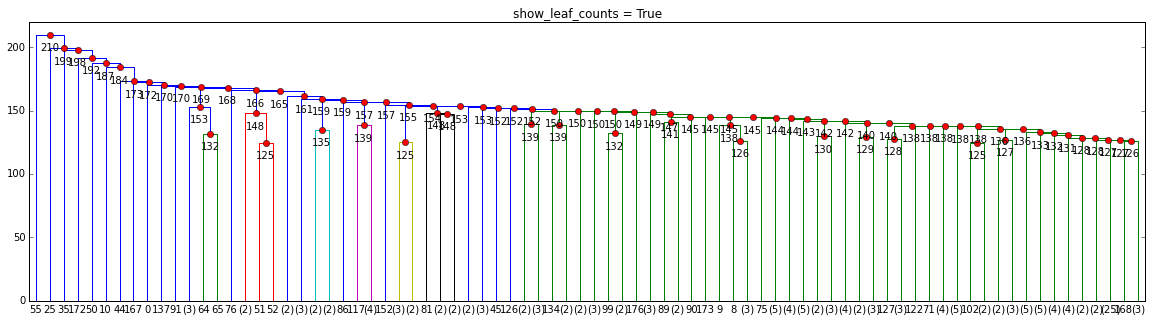

Aggregate Clustering plays using play_Vect


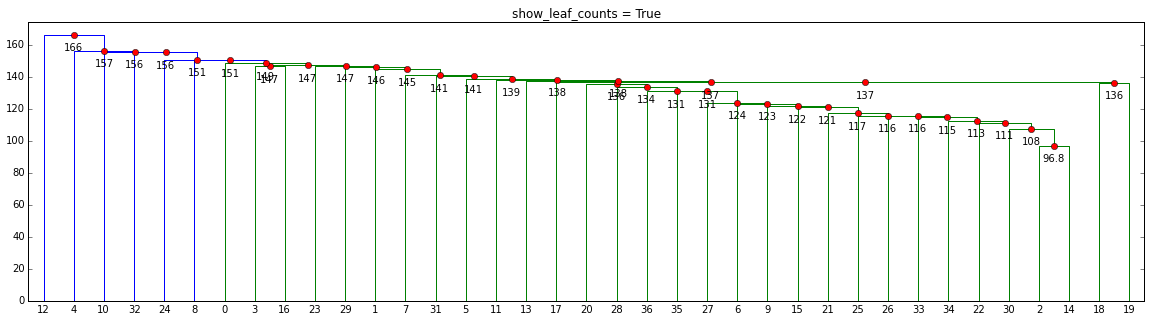

Aggregate Clustering plays using scene_Vect


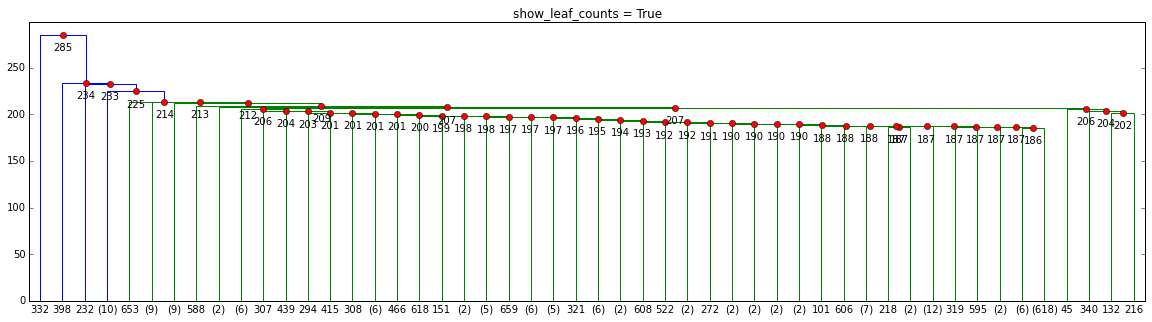

Aggregate Clustering plays using act_Readability


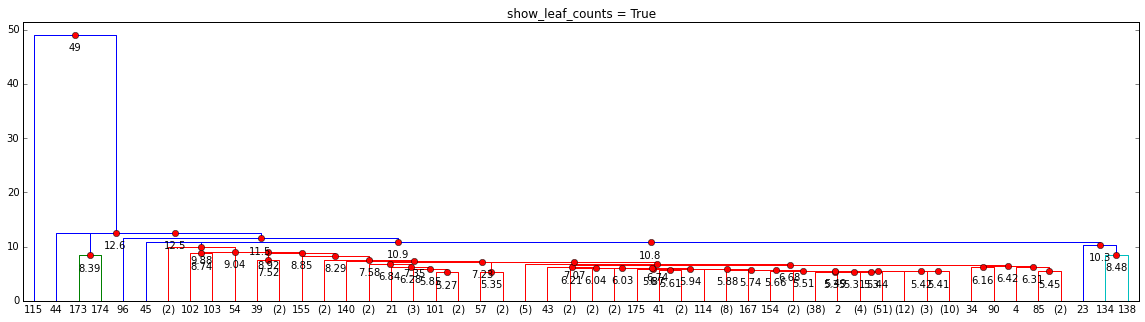

Aggregate Clustering plays using play_Readability


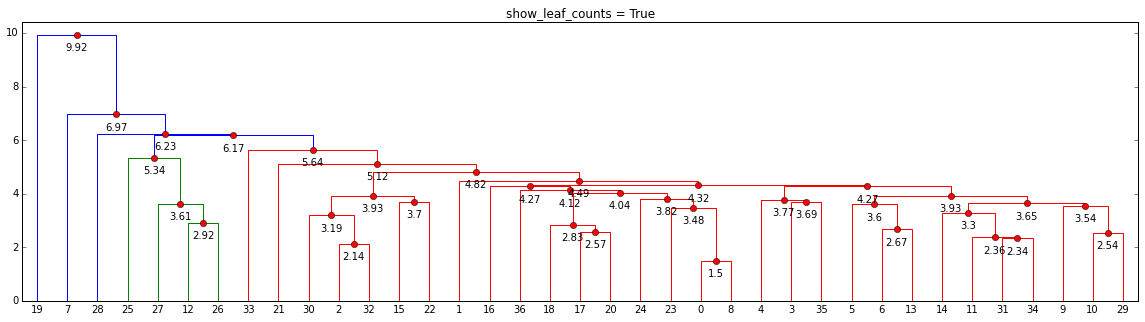

Aggregate Clustering plays using scene_Readability


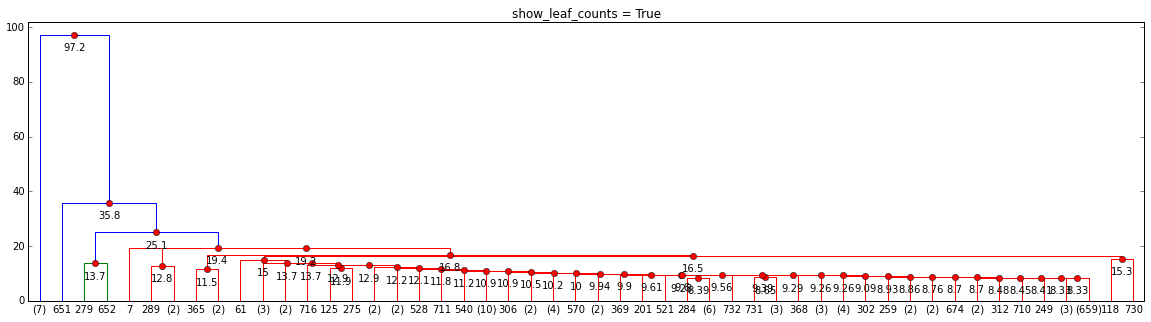

Aggregate Clustering plays using act_TTratio


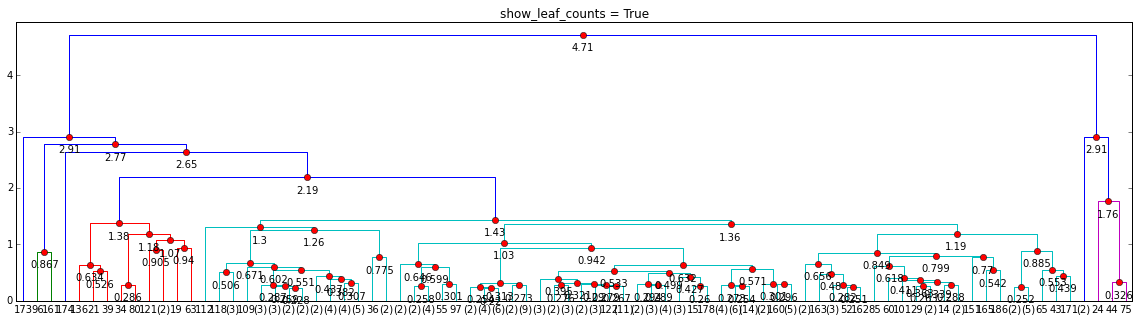

Aggregate Clustering plays using scene_TTratio


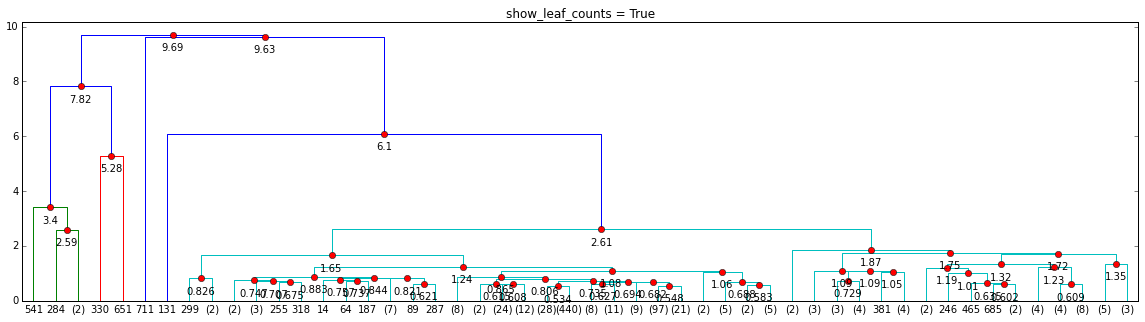

Aggregate Clustering poems using poem_Vect


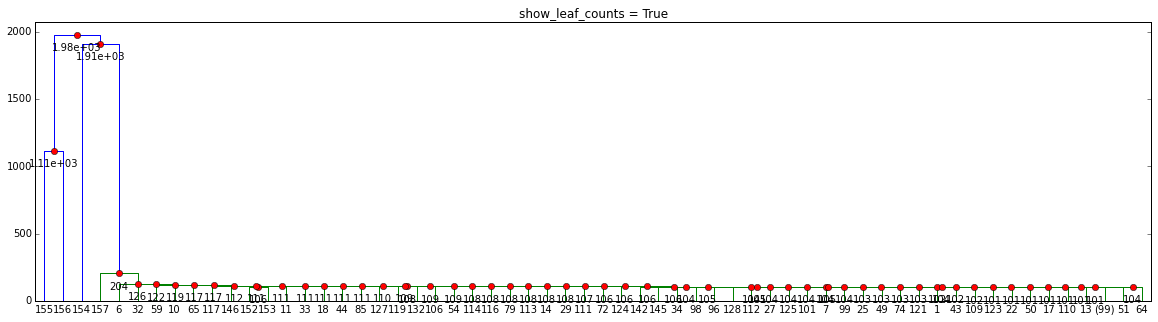

Aggregate Clustering poems using poem_2gram


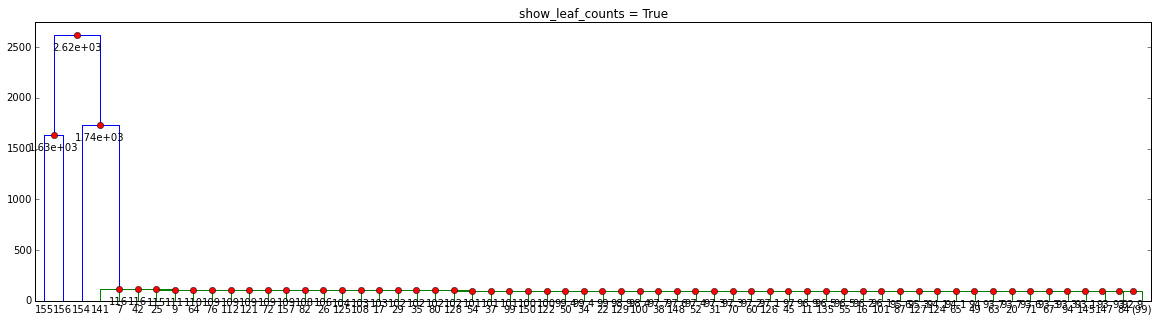

Aggregate Clustering poems using poem_4gram


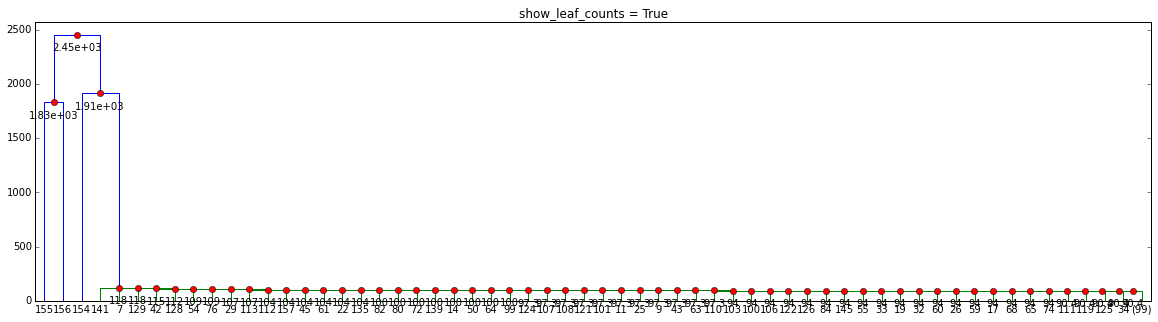

In [6]:
#%matplotlib inline 
import numpy as np
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
#from scipy.spatial.distance import is_valid_dm
from scipy.spatial import distance
import matplotlib.pyplot as plt
import pandas as pd

# Function to return dendrogram with label the horizontal segments of the diagram with the corresponding distance
def augmented_dendrogram(*args, **kwargs):

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        for i, d in zip(ddata['icoord'], ddata['dcoord']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            plt.plot(x, y, 'ro')
            plt.annotate("%.3g" % y, (x, y), xytext=(0, -8),
                         textcoords='offset points',
                         va='top', ha='center')

    return ddata

## Function to standardize features and return a euclidien distance matrix
def get_distance(x):
    
    # Read 1-gram features, standardize them  
    x = np.array(x)
    x= StandardScaler().fit_transform(x)

    # Return euclidien distance matrix
    #http://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.cdist.html#scipy.spatial.distance.cdist
    result = distance.cdist(x, x, 'euclidean')
    
    return (result)

#pca = PCA()
#pca.fit(x)
#x = pca.transform(x)

#plt.figure(1, figsize=(60, 50))
#plt.clf()
#plt.scatter(x[:, 0], x[:, 1])
#plt.axis('equal')
#plt.grid(True)

def calc_dendrogram(x,threshold = 150,p = 80,show_leaf_counts = True):
    linkage_matrix = linkage(x, "single")

    plt.figure(1, figsize=(20, 5))
    plt.clf()

    #plt.subplot(1, 2, 1)
    #show_leaf_counts = True
    ddata = augmented_dendrogram(linkage_matrix,
                   color_threshold=threshold,
                   p=p,
                   truncate_mode='lastp',
                   show_leaf_counts=show_leaf_counts,
                   )
    plt.title("show_leaf_counts = %s" % show_leaf_counts)



    plt.show()
    
# calc_dendrogram(x)


# #import vectorized feature arrays for acts and scenes
act_Vect = pd.read_csv('VectorizedFeatures/AllComplied/AllAct_Features_Vectorize.txt',sep=',',header = None)
scene_Vect = pd.read_csv('VectorizedFeatures/AllComplied/AllScene_Features_Vectorize.txt',sep=',',header = None)
play_Vect = pd.read_csv('VectorizedFeatures/AllComplied/ALLPlay_Features_Vectorize.txt',sep=',',header = None)

# # Import readability features 
act_Readability = pd.read_csv('Readability_Features/Act_Readability_Feature.txt',sep=',',header = None)
play_Readability = pd.read_csv('Readability_Features/Play_Readability_Feature.txt',sep=',',header = None)
scene_Readability = pd.read_csv('Readability_Features/Scene_Readability_Feature.txt',sep=',',header = None)

act_TTratio = pd.read_csv('TypeTokenRatioFeatures/Act_TTratio_.txt',sep=',',header = None)
scene_TTratio = pd.read_csv('TypeTokenRatioFeatures/Scene_TTratio_.txt',sep=',',header = None)



data = [act_Vect, play_Vect, scene_Vect,act_Readability,play_Readability,scene_Readability,act_TTratio,scene_TTratio]
titles = ["act_Vect","play_Vect", "scene_Vect","act_Readability","play_Readability","scene_Readability","act_TTratio","scene_TTratio"]
thresholds = [150,150,220,10,6,20,2,6]
ps = [80,80,50,50,80,50,80,50]

    
# do for all data
for i in range(len(data)):
    data[i] = get_distance(data[i])
    print("Aggregate Clustering plays using", titles[i])
    calc_dendrogram(data[i],thresholds[i],ps[i])
    
    
## Aggregate Clustering plays

# #import vectorized feature arrays for acts and scenes
poem_Vect = pd.read_csv('Poems/Poem_Features_Vectorize.txt',sep=',',header = None)
poem_2gram = pd.read_csv('Poems/Poem_Features_ngram2.txt',sep=',',header = None)
poem_4gram = pd.read_csv('Poems/Poem_Features_ngram4.txt',sep=',',header = None)

# # Import readability features 
# act_Readability = pd.read_csv('Readability_Features/Act_Readability_Feature.txt',sep=',',header = None)
# play_Readability = pd.read_csv('Readability_Features/Play_Readability_Feature.txt',sep=',',header = None)
# scene_Readability = pd.read_csv('Readability_Features/Scene_Readability_Feature.txt',sep=',',header = None)



data = [poem_Vect, poem_2gram, poem_4gram]
titles = ["poem_Vect","poem_2gram", "poem_4gram",]
thresholds = [500,500,500]
ps = [60,60,60]

    
# do for all data
for i in range(len(data)):
    data[i] = get_distance(data[i])
    print("Aggregate Clustering poems using", titles[i])
    calc_dendrogram(data[i],thresholds[i],ps[i])


## step 7 - KMM, GMM, DBSCAN Clustering



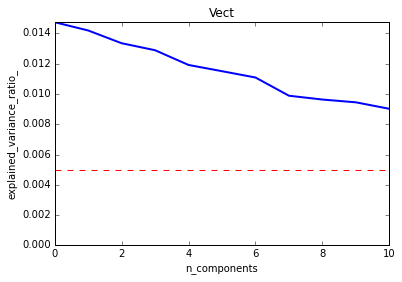


None


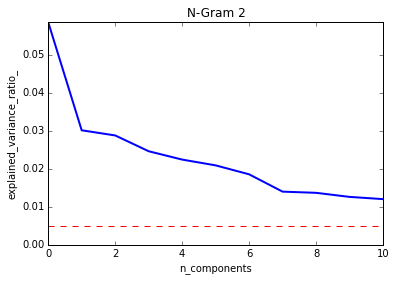


None


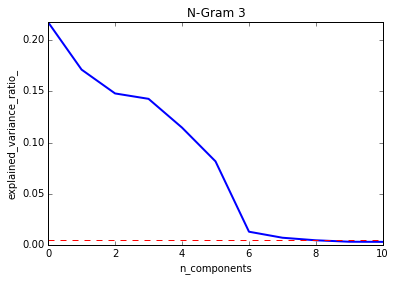


None


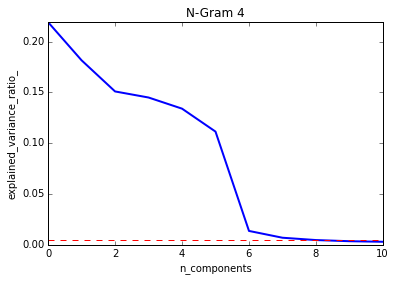


None


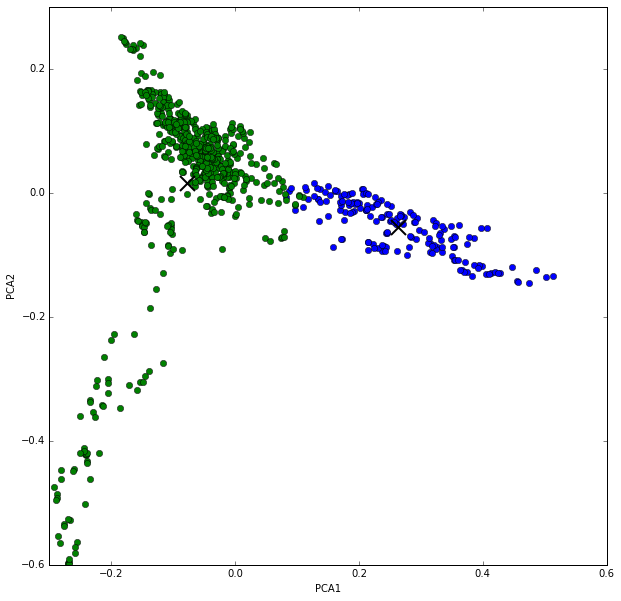

KMeans(copy_x=True, init='k-means++', max_iter=10000, n_clusters=2, n_init=30,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)


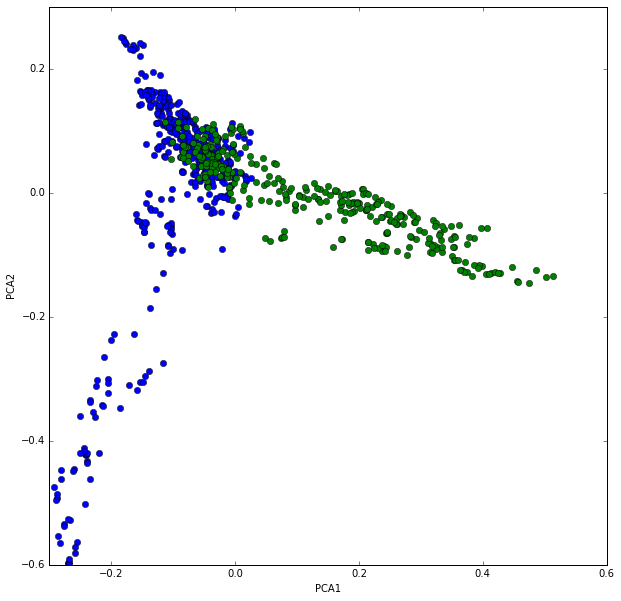

GMM(covariance_type='full', init_params='wmc', min_covar=0.001,
  n_components=2, n_init=30, n_iter=100, params='wmc', random_state=None,
  thresh=None, tol=0.001)


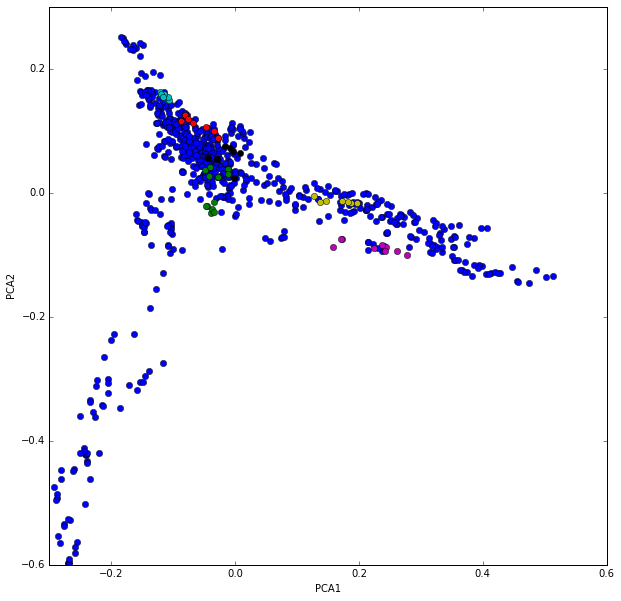

DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
    min_samples=5, p=None, random_state=None)


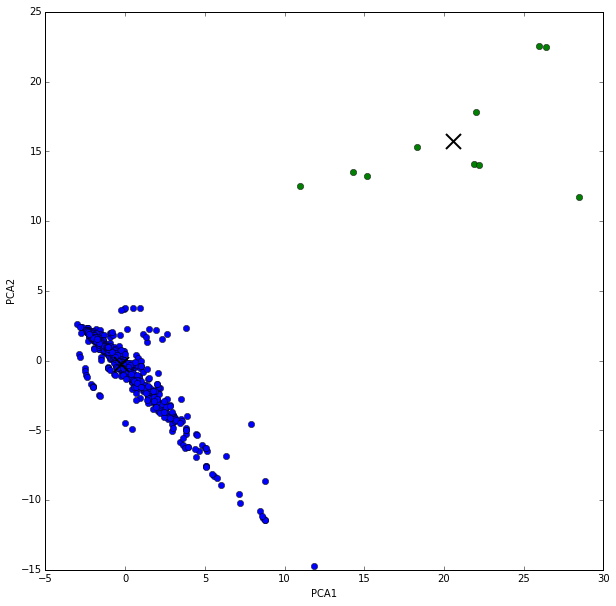

KMeans(copy_x=True, init='k-means++', max_iter=10000, n_clusters=2, n_init=30,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)


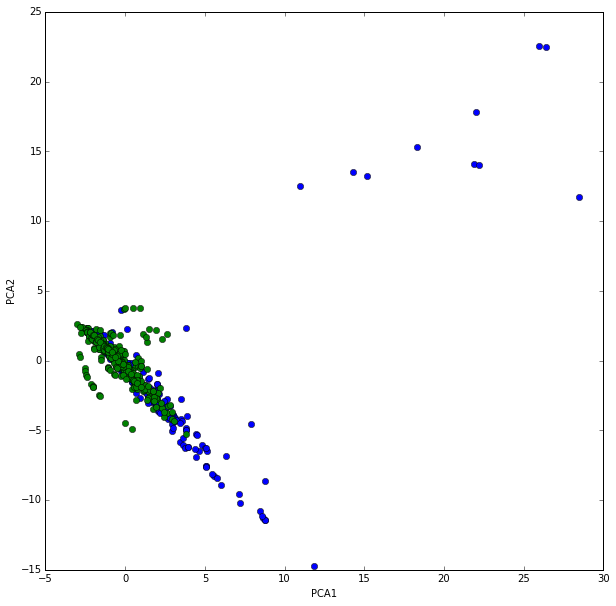

GMM(covariance_type='full', init_params='wmc', min_covar=0.001,
  n_components=2, n_init=30, n_iter=100, params='wmc', random_state=None,
  thresh=None, tol=0.001)


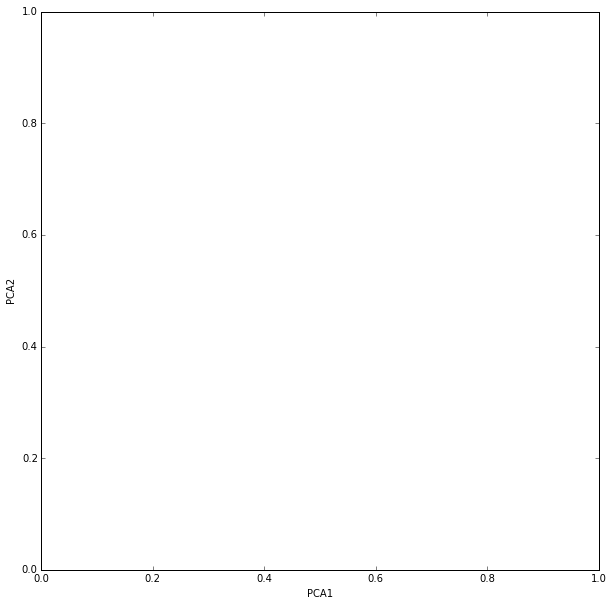

DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
    min_samples=5, p=None, random_state=None)


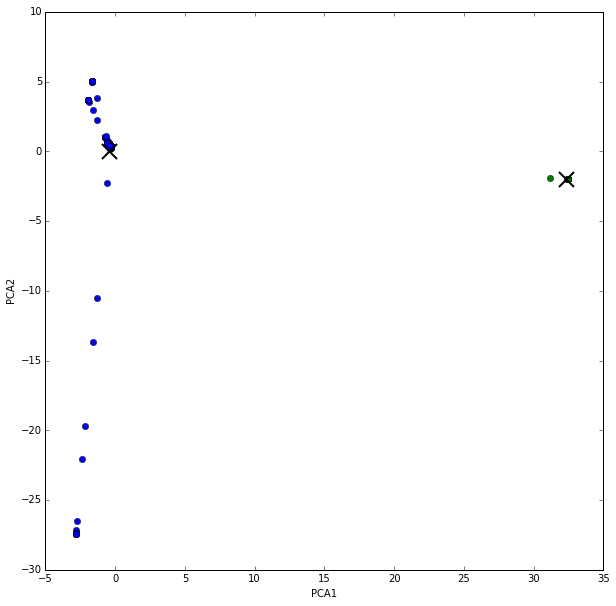

KMeans(copy_x=True, init='k-means++', max_iter=10000, n_clusters=2, n_init=30,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)


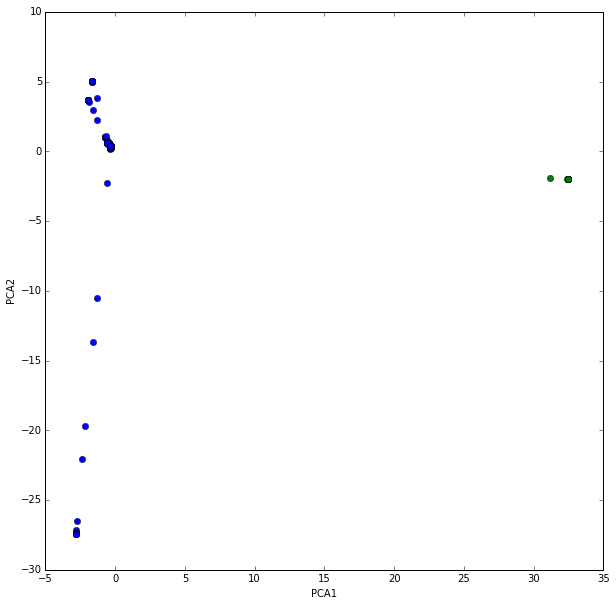

GMM(covariance_type='full', init_params='wmc', min_covar=0.001,
  n_components=2, n_init=30, n_iter=100, params='wmc', random_state=None,
  thresh=None, tol=0.001)


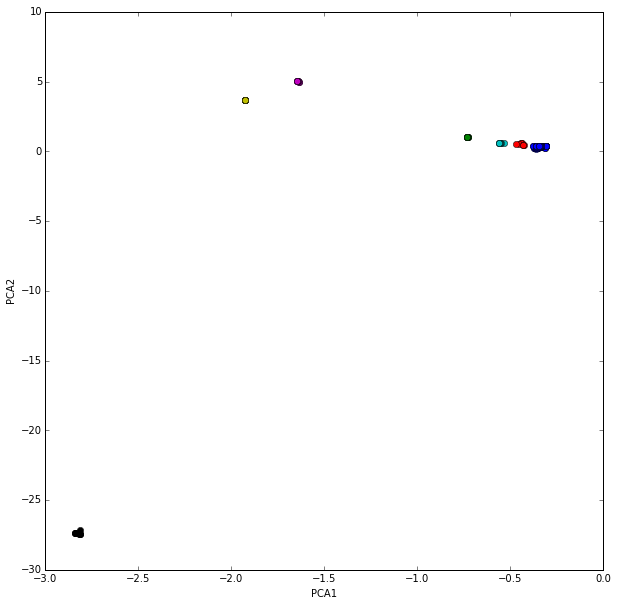

DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
    min_samples=5, p=None, random_state=None)


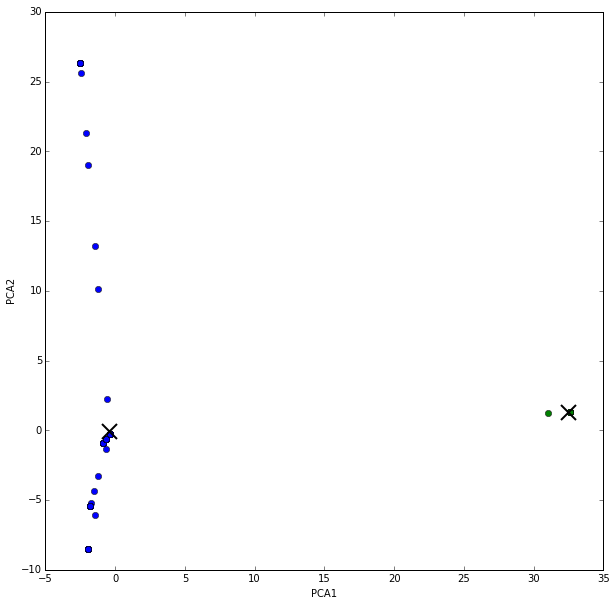

KMeans(copy_x=True, init='k-means++', max_iter=10000, n_clusters=2, n_init=30,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)


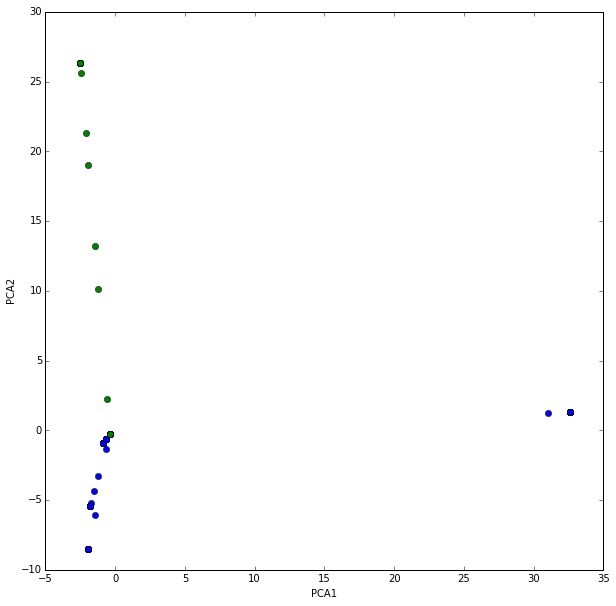

GMM(covariance_type='full', init_params='wmc', min_covar=0.001,
  n_components=2, n_init=30, n_iter=100, params='wmc', random_state=None,
  thresh=None, tol=0.001)


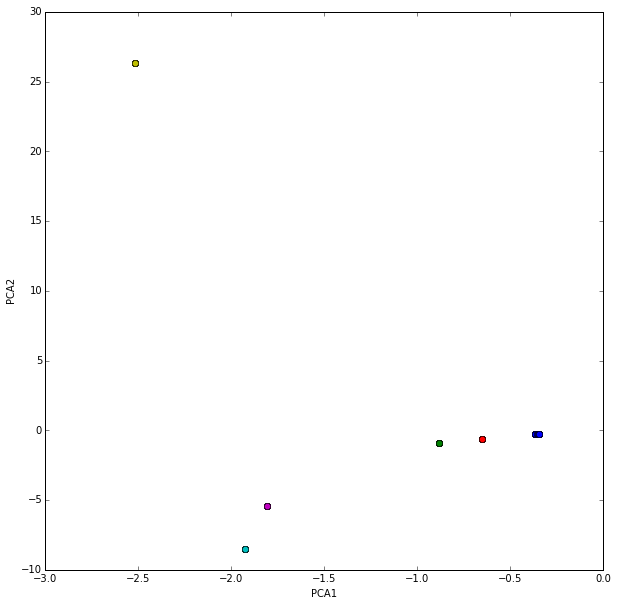

DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
    min_samples=5, p=None, random_state=None)


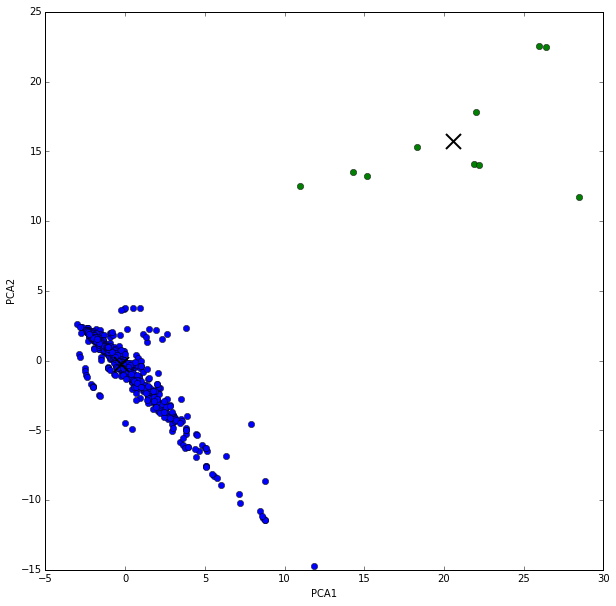

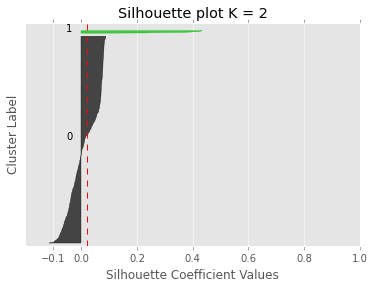

At K = 2, Average Silhouette Score = 0.0213062125806


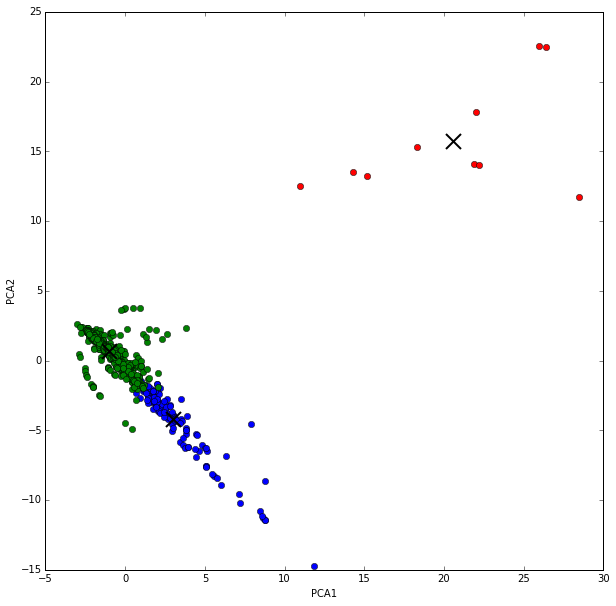

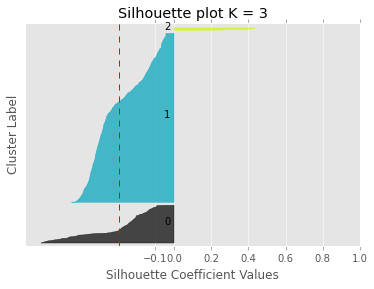

At K = 3, Average Silhouette Score = -0.297679367049


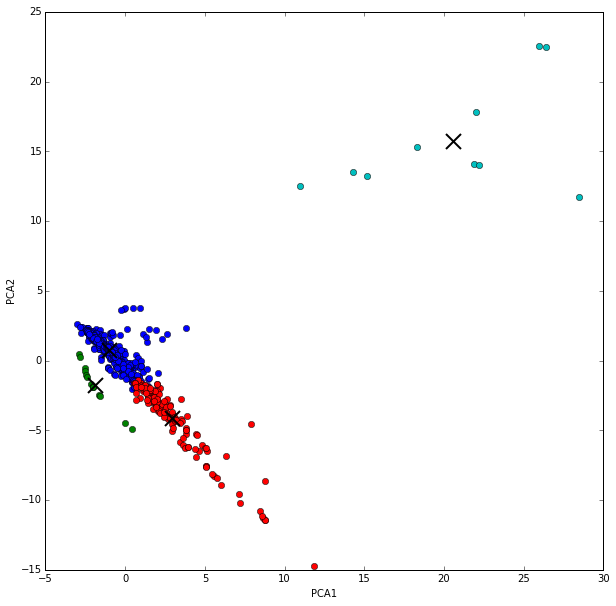

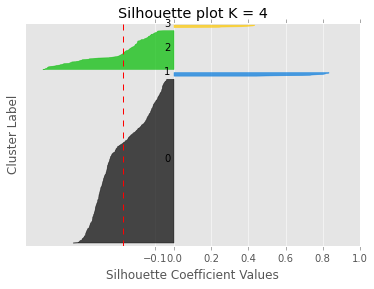

At K = 4, Average Silhouette Score = -0.27208091037


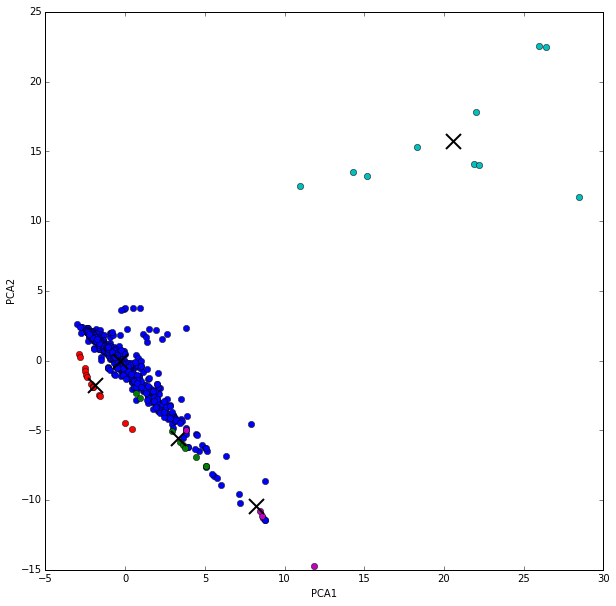

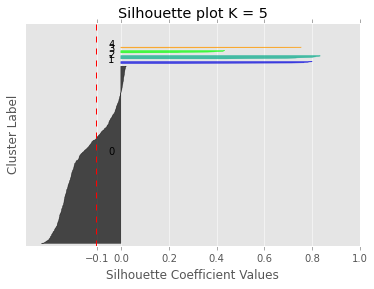

At K = 5, Average Silhouette Score = -0.103240078595


In [7]:
%matplotlib inline 
from sklearn.decomposition import PCA
from sklearn.grid_search import GridSearchCV
from sklearn.cluster import KMeans, DBSCAN 
from sklearn.mixture import GMM 
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import hamming, euclidean
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## import data for scenes (starting with 5,000 features)
V = pd.read_csv('VectorizedFeatures/AllComplied/AllScene_Features_Vectorize.txt',sep=',',header = None)
L = pd.read_csv('LSA_VectorizedFeatures/Scene_Features_Vectorize_LSA.txt',sep=',',header = None)
N2 = pd.read_csv('N-gramFeatures/Scene_Features_ngram2.txt',sep=',',header = None)
N3 = pd.read_csv('N-gramFeatures/Scene_Features_ngram3.txt',sep=',',header = None)
N4 = pd.read_csv('N-gramFeatures/Scene_Features_ngram4.txt',sep=',',header = None)
R = pd.read_csv('Readability_Features/Scene_Readability_feature.txt',sep=',',header = None)
TT = pd.read_csv('TypeTokenRatioFeatures/Scene_TTratio_.txt',sep=',',header = None)

## Standardizing
def standardize(X):
    return StandardScaler().fit_transform(X)

data = [V, N2, N3, N4]
data = [standardize(X) for X in data]
titles = ['Vect', 'N-Gram 2', 'N-Gram 3', 'N-Gram 4']

## Extract principal components , looking at variance explained of n components
# Using PCA
def getPCAPlot(X, title):
    pca = PCA()
    pca.fit(X)
    X_pca = pca.transform(X)

    # Plot the PCA spectrum
    plt.plot(pca.explained_variance_ratio_, linewidth=2)
    plt.axis('tight')
    plt.title(title)
    plt.xlabel('n_components')
    plt.ylabel('explained_variance_ratio_')
    plt.axhline(y=0.005, color="red", linestyle="--")
    plt.xlim(0,10)
    plt.show()
    print('')

# do for all data
for i in range(len(data)):
    print(getPCAPlot(data[i], titles[i]))

## results show that we need 50 components for Vect and N2 and 6 components for N3 and N4

## Trying n components
def getPCA(X, n=50):
    pca = PCA(n)
    pca.fit(X)
    return pca.transform(X)

### function to fit KMeans, GMM, DBSCAN
def getKM(X, k):
    km = KMeans(n_clusters=k, init='k-means++', max_iter=10000, n_init=30)
    km.fit(X)
    klabels = km.labels_
    kcentroids = km.cluster_centers_

    ## plot K-Means
    plt.figure(figsize=(10, 10))
    for i in range(k):
        # plot data points
        dplt = X[np.where(klabels==i)]
        plt.plot(dplt[:,0],dplt[:,1],'o')

        # plot centroids
        lines = plt.plot(kcentroids[i,0],kcentroids[i,1],'kx')
        plt.setp(lines,ms=15.0)
        plt.setp(lines,mew=2.0)
    plt.xlabel('PCA1')
    plt.ylabel('PCA2')
    plt.show()
    return km

def getGMM(X, k):
    gmm = GMM(n_components=k, n_init=30, covariance_type='full')
    gmm.fit(X)
    glabels = gmm.predict(X)
    gmeans = gmm.means_
    gcovar = gmm.covars_

    ## plot GMM
    plt.figure(figsize=(10, 10))
    for i in range(k):
        # plot data points
        dplt = X[np.where(glabels==i)]
        plt.plot(dplt[:,0],dplt[:,1],'o')
    plt.xlabel('PCA1')
    plt.ylabel('PCA2')
    plt.show()
    return gmm

def getDBS(X):
    dbs = DBSCAN()
    dbs.fit(X)
    dlabels = dbs.labels_
    dk = dlabels.max()

    ## plot DBSCAN
    plt.figure(figsize=(10, 10))
    for i in range(dk):
        # plot data points
        dplt = X[np.where(dlabels==i)]
        plt.plot(dplt[:,0],dplt[:,1],'o')
    plt.xlabel('PCA1')
    plt.ylabel('PCA2')
    plt.show()
    return dbs

## look at V and N2
for X in [V, N2]:
    ### PCA
    X = getPCA(X, n=50)
    k = 2

    ### K-Means cluster
    print(getKM(X,k))

    ### GMM with covariance_type = full 
    print(getGMM(X,k))

    ### DBSCAN 
    print(getDBS(X))
    
## look at N3 and N4
for X in [N3, N4]:
    ### PCA
    X = getPCA(X, n=6)
    k = 2

    ### K-Means cluster
    print(getKM(X,k))

    ### GMM with covariance_type = full 
    print(getGMM(X,k))

    ### DBSCAN 
    print(getDBS(X))
    
## Silhouette calculation & plot
## Adapted from http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html
import matplotlib.cm as cm

## function to generate list of silhouettes
def findSilh(km, X):
    k = km.n_clusters
    clusters = []
    points = {}
    for i in range(k):
        clusters.append(km.cluster_centers_[i])
        ps = X[np.where(km.labels_==i)]
        points[i] = [np.array(p) for p in ps]
    all_silhs = []

    # loop all clusters
    for c in range(k):
        cluster = clusters[c]
        other_clusters = clusters[:c] + clusters[c+1:]
        silhs = [] #create empty list for silhouettes

        # loop all points in clusters
        for i in range(len(points[c])):
            point = points[c][i]
            others = points[c][:i] + points[c][i+1:]

            # get a(i) -- find average hamming distance between a(i) and other q points in the same cluster
            sum = 0
            for q in others:
                sum += euclidean(point, q)
            a = sum / len(others)

            # get b(i) -- find lowest average hamming distance between a(i) to q points in other clusters
            b_list = []
            for d in other_clusters: #find average hamming distance to each other cluster
                sum = 0
                for q in d:
                    sum += euclidean(point, q)
                avg_dist = sum / len(d)
                b_list.append(avg_dist) #add to list
            b = min(b_list) #get the lowest one

            # calculate silhouette
            silh = (b - a) / max(a, b)
            silhs.append(silh) #add to list
        silhs.sort() #sort
        all_silhs.append(silhs) #add to list of all clusters
    return all_silhs

## function to plot
def plotSilh(s):
    with plt.style.context('ggplot'):
        fig = plt.figure()
        n = len(s)
        y_lower = 10
        silh_avg = np.mean([x for list in s for x in list])
        for i in range(n): 
            cls = s[i]
            size = len(cls)
            y_upper = y_lower + size
            color = cm.spectral(float(i) / n)
            plt.fill_betweenx(np.arange(y_lower, y_upper), 0, cls, facecolor=color, edgecolor=color, alpha=0.7)
            plt.text(-0.05, y_lower + 0.5 * size, str(i))
            y_lower = y_upper + 10

        plt.title('Silhouette plot K = ' + str(n))
        plt.xlabel('Silhouette Coefficient Values')
        plt.ylabel('Cluster Label')
        plt.axvline(x=silh_avg, color="red", linestyle="--")
        plt.yticks([])  
        plt.xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.show()
    return "At K = " + str(n) + ", Average Silhouette Score = " + str(silh_avg)


### Evaluate KMeans cluster performance of each K choice (2 to 5) using Silhouette plot
n_k = [2, 3, 4, 5]
for k in n_k:
    X = getPCA(N2, n=50)
    km = getKM(X, k)
    print(plotSilh(findSilh(km, X)))
